In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import tensorflow as tf
print(tf.__version__)

2.13.0


In [3]:
import sys
sys.path.append("..")

In [4]:
import pandas as pd

SAVE_DIR = "../../data"

file_criteo = SAVE_DIR + "/criteo-uplift-v2.1.csv"

df_criteo = pd.read_csv(file_criteo, sep=',')
df_criteo

f0         f1        f2        f3         f4        f5  \
0         12.616365  10.059654  8.976429  4.679882  10.280525  4.115453   
1         12.616365  10.059654  9.002689  4.679882  10.280525  4.115453   
2         12.616365  10.059654  8.964775  4.679882  10.280525  4.115453   
3         12.616365  10.059654  9.002801  4.679882  10.280525  4.115453   
4         12.616365  10.059654  9.037999  4.679882  10.280525  4.115453   
...             ...        ...       ...       ...        ...       ...   
13979587  26.297764  10.059654  9.006250  4.679882  10.280525  4.115453   
13979588  12.642207  10.679513  8.214383 -1.700105  10.280525  3.013064   
13979589  12.976557  10.059654  8.381868  0.842442  11.029584  4.115453   
13979590  24.805064  10.059654  8.214383  4.679882  10.280525  4.115453   
13979591  12.616365  10.059654  8.214383  4.679882  10.280525  3.013064   

                 f6        f7        f8         f9       f10       f11  \
0          0.294443  4.833815  3.955396  13.190056  5.300375 -0.168679   
1          0.294443  4.833815  3.955396  13.190056  5.300375 -0.168679   
2          0.294443  4.833815  3.955396  13.190056  5.300375 -0.168679   
3          0.294443  4.833815  3.955396  13.190056  5.300375 -0.168679   
4          0.294443  4.833815  3.955396  13.190056  5.300375 -0.168679   
...             ...       ...       ...        ...       ...       ...   
13979587  -3.282109  4.833815  3.839578  13.190056  5.300375 -0.168679   
13979588 -13.955150  6.269026  3.971858  13.190056  5.300375 -0.168679   
13979589  -8.281971  4.833815  3.779212  23.570168  6.169187 -0.168679   
13979590  -1.288207  4.833815  3.971858  13.190056  5.300375 -0.168679   
13979591   0.294443  9.332563  3.971858  13.190056  5.300375 -0.168679   

          treatment  conversion  visit  exposure  
0                 1           0      0         0  
1                 1           0      0         0  
2                 1           0      0         0  
3                 1           0      0         0  
4                 1           0      0         0  
...             ...         ...    ...       ...  
13979587          1           0      0         0  
13979588          1           0      0         1  
13979589          1           0      1         0  
13979590          1           0      0         0  
13979591          1           0      0         0  

[13979592 rows x 16 columns]

In [5]:
random_state=20220720
df_criteo=df_criteo.sample(frac=1.0, random_state=random_state).reset_index(drop=True)

In [6]:
X = df_criteo[['f0', 'f1', 'f2', 'f3', 'f4', 'f5', 'f6', 'f7', 'f8', 'f9', 'f10', 'f11']].values
X.shape

(13979592, 12)

In [7]:
# scale the feature values between 0 and 1
def scaling(x, min, max):
    return np.where(x < min, 0.0, np.where(x > max, 1.0, (x - min) / (max - min)))

In [8]:
import numpy as np

X[:, 0] = scaling(X[:, 0], min=np.min(X[:, 0]), max=np.max(X[:, 0]))
X[:, 1] = scaling(X[:, 1], min=np.min(X[:, 1]), max=np.max(X[:, 1]))
X[:, 2] = scaling(X[:, 2], min=np.min(X[:, 2]), max=np.max(X[:, 2]))
X[:, 3] = scaling(X[:, 3], min=np.min(X[:, 3]), max=np.max(X[:, 3]))
X[:, 4] = scaling(X[:, 4], min=np.min(X[:, 4]), max=np.max(X[:, 4]))
X[:, 5] = scaling(X[:, 5], min=np.min(X[:, 5]), max=np.max(X[:, 5]))
X[:, 6] = scaling(X[:, 6], min=np.min(X[:, 6]), max=np.max(X[:, 6]))
X[:, 7] = scaling(X[:, 7], min=np.min(X[:, 7]), max=np.max(X[:, 7]))
X[:, 8] = scaling(X[:, 8], min=np.min(X[:, 8]), max=np.max(X[:, 8]))
X[:, 9] = scaling(X[:, 9], min=np.min(X[:, 9]), max=np.max(X[:, 9]))
X[:, 10] = scaling(X[:, 10], min=np.min(X[:, 10]), max=np.max(X[:, 10]))
X[:, 11] = scaling(X[:, 11], min=np.min(X[:, 11]), max=np.max(X[:, 11]))

In [9]:
T = df_criteo['treatment'].values.reshape(-1, 1)
Y_visit = df_criteo['visit'].values.reshape(-1, 1)
Y_conv = df_criteo['conversion'].values.reshape(-1, 1)

T.shape, Y_visit.shape, Y_conv.shape

((13979592, 1), (13979592, 1), (13979592, 1))

In [10]:
train_len = int(len(X) * 0.7)

X_train = X[:train_len, :]
T_train = T[:train_len, :]
Y_visit_train = Y_visit[:train_len, :]
Y_conv_train = Y_conv[:train_len, :]

X_test = X[train_len:, :]
T_test = T[train_len:, :]
Y_visit_test = Y_visit[train_len:, :]
Y_conv_test = Y_conv[train_len:, :]

train_len, X_train.shape, X_test.shape

(9785714, (9785714, 12), (4193878, 12))

In [11]:
sys.path.append("..")
from model.uplift_model import *

In [12]:
import matplotlib.pyplot as plt

def plot_loss(history, *losses):
    for loss in losses:
        plt.plot(history.history[loss], label=loss)
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)
    plt.show()
    

In [13]:
import causalml
from causalml.metrics import *
import matplotlib.pyplot as plt


def get_causalml_auuc(Y, T, ite_pred, normalize=True):

    metric_df = pd.DataFrame([ite_pred.flatten(),
                               Y.flatten(),
                               T.flatten()]).T


    metric_df.columns=['model','y','w'] 
    uplift_rank_lift = get_cumlift(metric_df)

    normalize = True

    uplift_rank_gain = uplift_rank_lift.mul(uplift_rank_lift.index.values, axis=0)
    if normalize:
        uplift_rank_gain = uplift_rank_gain.div(np.abs(uplift_rank_gain.iloc[-1, :]), axis=1)
    uplift_rank_auuc_score = uplift_rank_gain.sum()/uplift_rank_gain.shape[0]
    
    print(uplift_rank_auuc_score)
    
    step = len(T) // 200 
    
    uplift_rank_gain.iloc[::step, :].plot()
    plt.show()
    
    return uplift_rank_auuc_score, uplift_rank_gain.iloc[::step, :]

In [14]:
count = 20


trainable_weights
p1_hidden_1/kernel:0
p1_hidden_1/bias:0
p1_hidden_2/kernel:0
p1_hidden_2/bias:0
p1/kernel:0
p1/bias:0
non_trainable_weights
Model: "model_4"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 p0_raw_features (InputLaye  [(None, 12)]                 0         []                            
 r)                                                                                               
                                                                                                  
 treated_input (InputLayer)  [(None, 1)]                  0         []                            
                                                                                                  
 concatenate_4 (Concatenate  (None, 13)                   0         ['p0_raw_features[0][0]',     
 )                                               

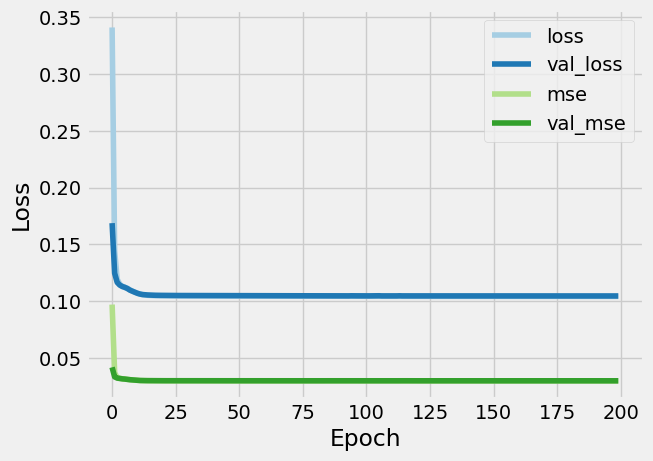

iteration =  2


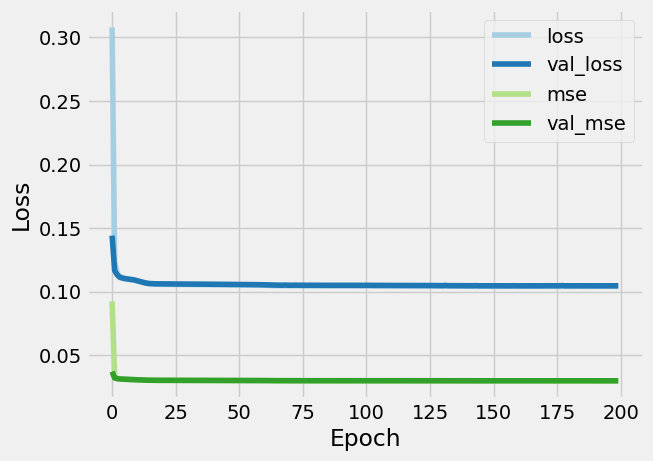

iteration =  3


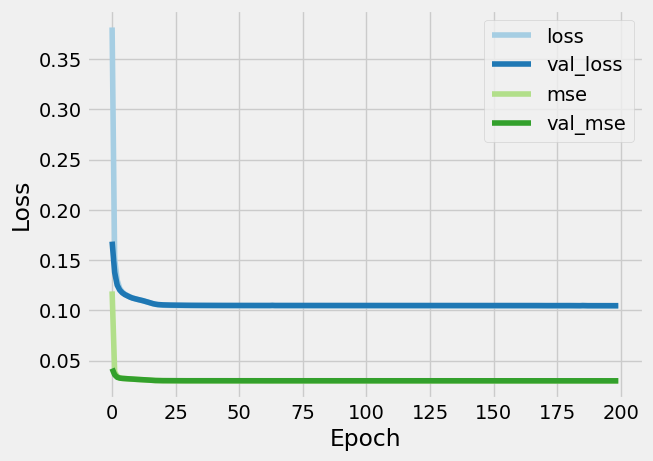

iteration =  4


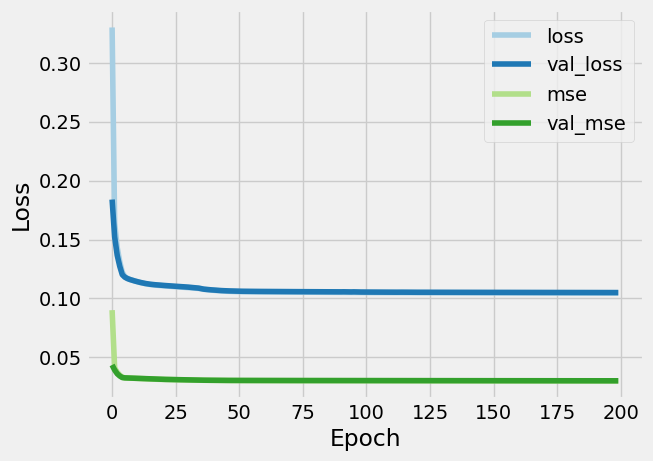

iteration =  5


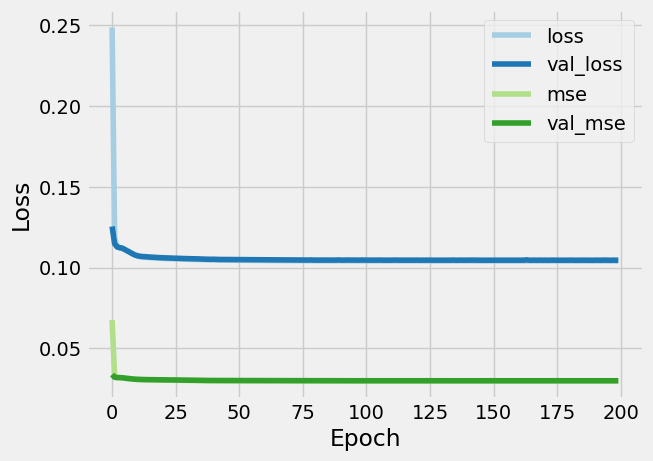

iteration =  6


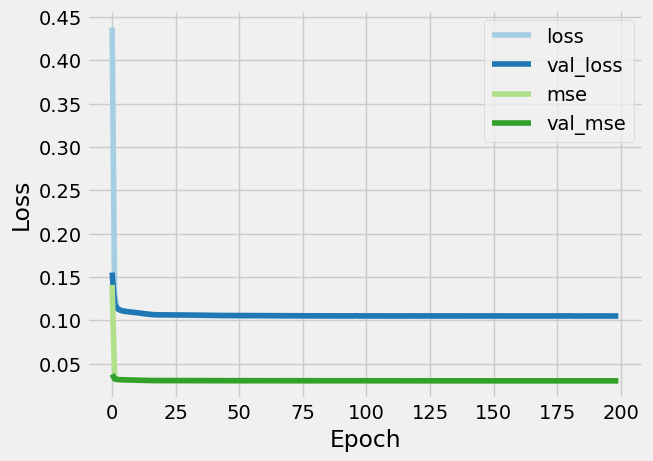

iteration =  7


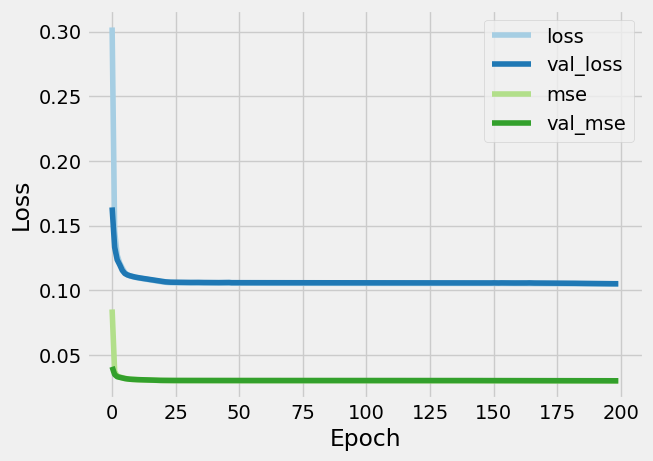

iteration =  8


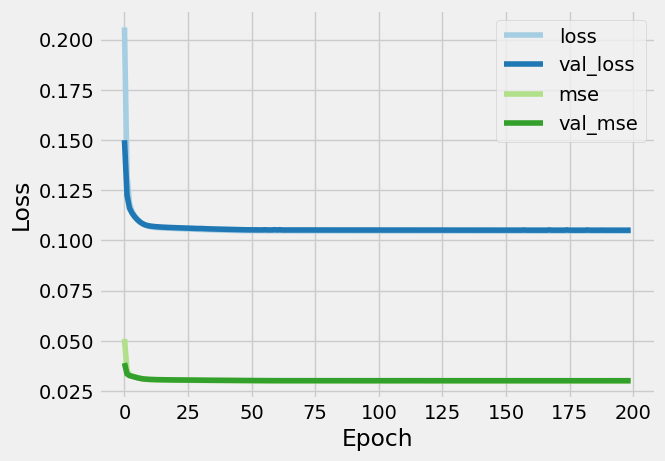

iteration =  9


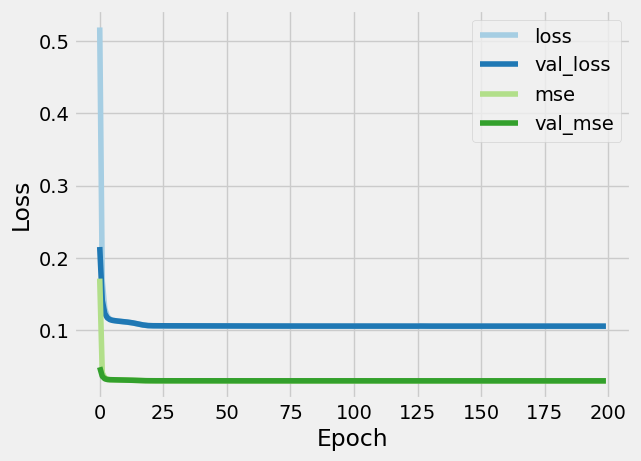

iteration =  10


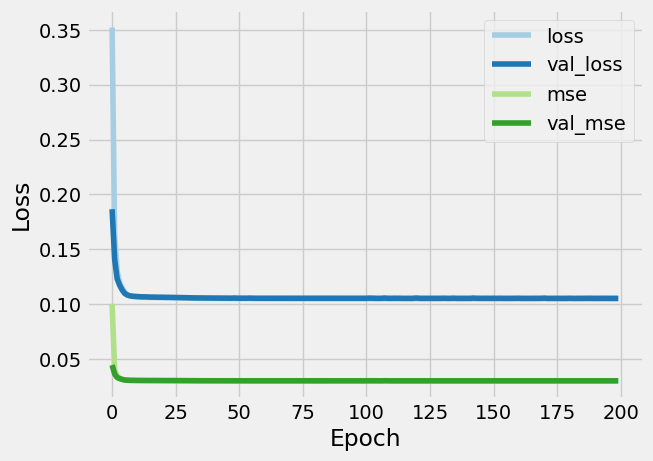

iteration =  11


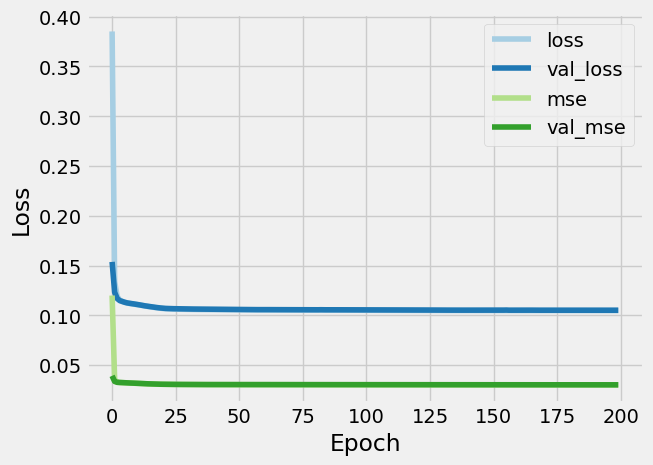

iteration =  12


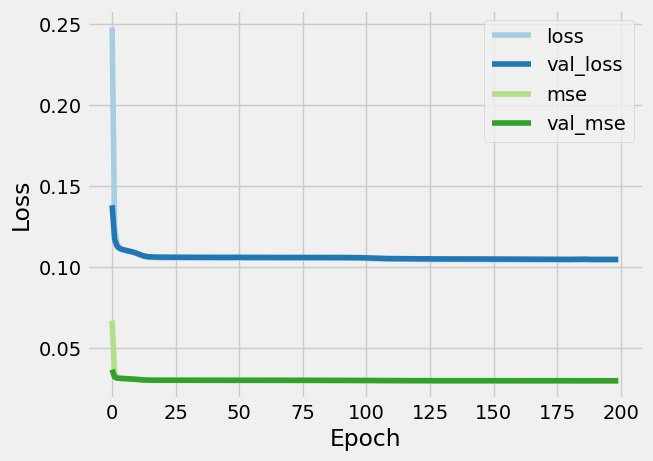

iteration =  13


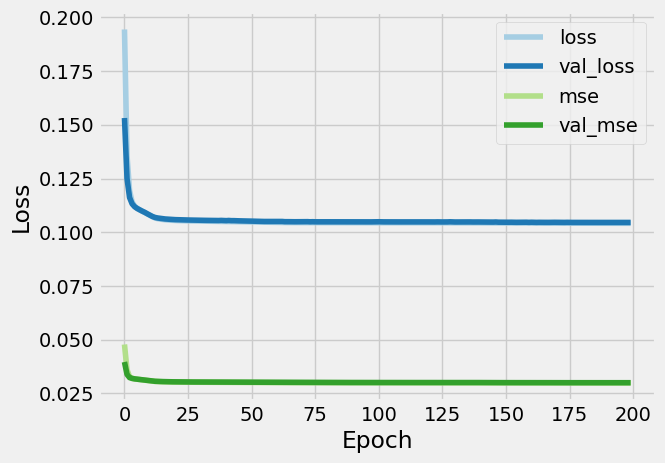

iteration =  14


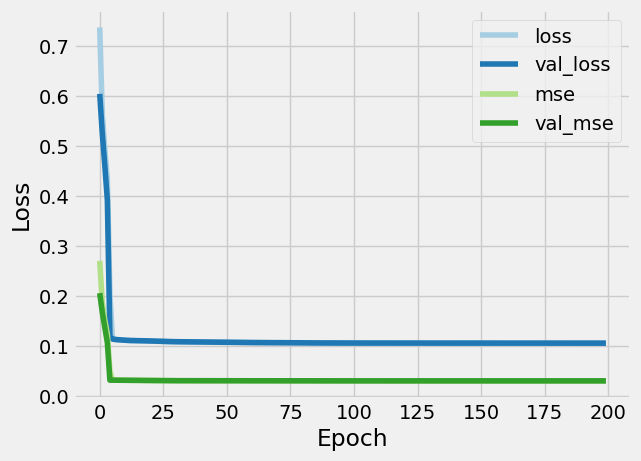

iteration =  15


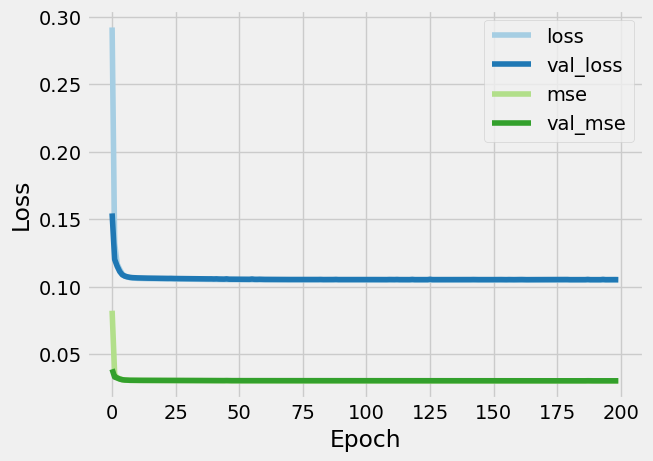

iteration =  16


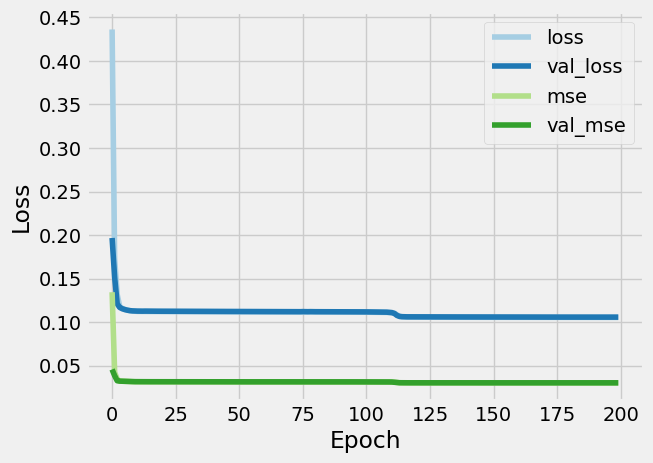

iteration =  17


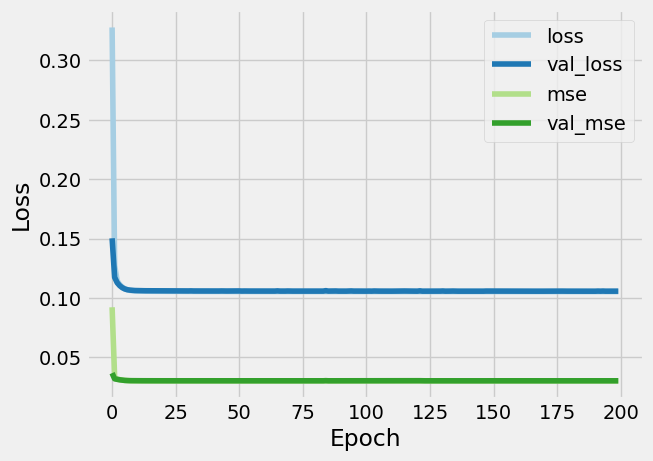

iteration =  18


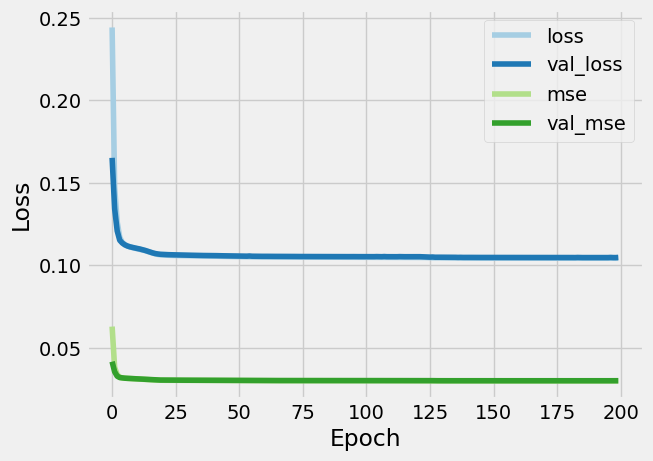

iteration =  19


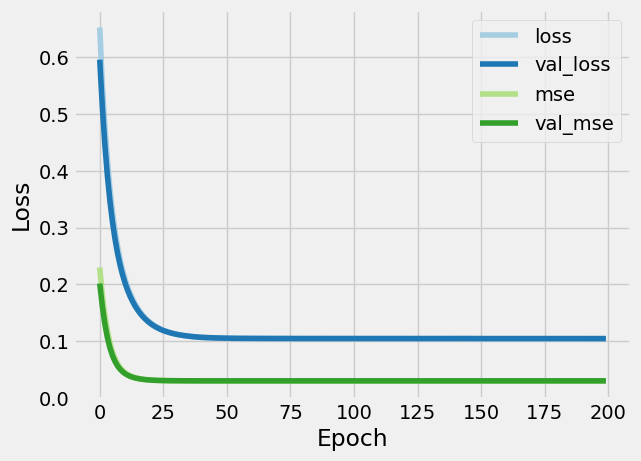

iteration =  20


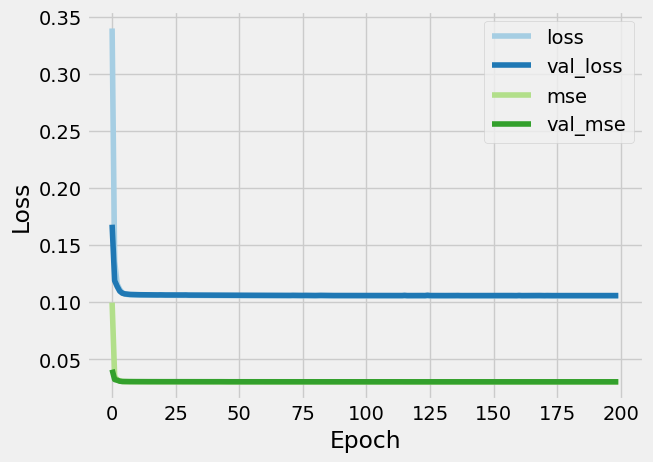

In [20]:
# S-Learner
import keras
import keras.backend as K
import tensorflow as tf
from keras.callbacks import LearningRateScheduler, ModelCheckpoint
from keras.callbacks import ReduceLROnPlateau
from model.uplift_model import *
import os

final_model = get_slearner_criteo_model()
final_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['mse'])
#lambda y_true,y_pred: y_pred
print('trainable_weights')
for x in final_model.trainable_weights:
    print(x.name)
print('non_trainable_weights')
for x in final_model.non_trainable_weights:
    print(x.name)
final_model.summary()


model_save_dir = '../model_file/uplift/criteo/final_model/slearner/'
os.makedirs(model_save_dir, exist_ok=True)

for i in range(count):

    print("iteration = ", i + 1)
    
    final_model = get_slearner_criteo_model()
    final_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['mse'])
    
    mcp_save = ModelCheckpoint(
        os.path.join(model_save_dir, f"slearner_criteo_model_{i+1}.h5"),
        save_best_only=True,
        monitor='val_loss',
        mode='min',
        save_weights_only=True
        )
    #mcp_save = ModelCheckpoint('../model_file/uplift/criteo/final_model/slearner/slearner_criteo_model_{}.h5'.format(i+1), save_best_only=True, monitor='val_loss', mode='min', save_weights_only=True)
    history = final_model.fit([X_train, T_train], Y_visit_train, validation_split=0.2, epochs=200, batch_size=32688, shuffle=True, verbose=0, callbacks=[mcp_save])

    plot_loss(history, "loss", "val_loss", "mse", "val_mse")
    
    

iteration =  1
131059/131059 [==============================] - 76s 577us/step
auc0.9454513485842775
mse0.029828312306920034
131059/131059 [==============================] - 88s 670us/step
model    0.83838
dtype: float64


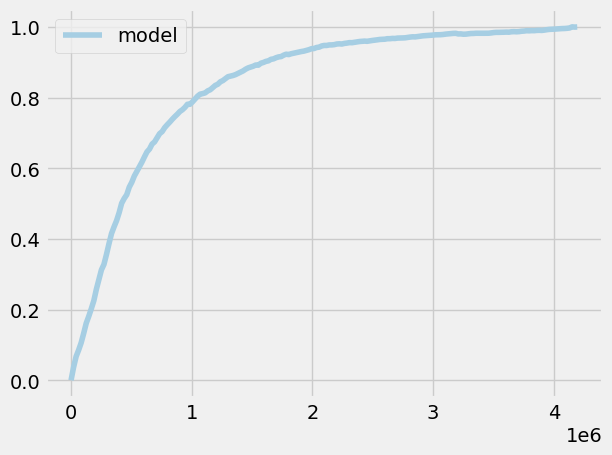



iteration =  2
131059/131059 [==============================] - 87s 664us/step
auc0.9453308429506613
mse0.029823490992837723
131059/131059 [==============================] - 89s 675us/step
model    0.826363
dtype: float64


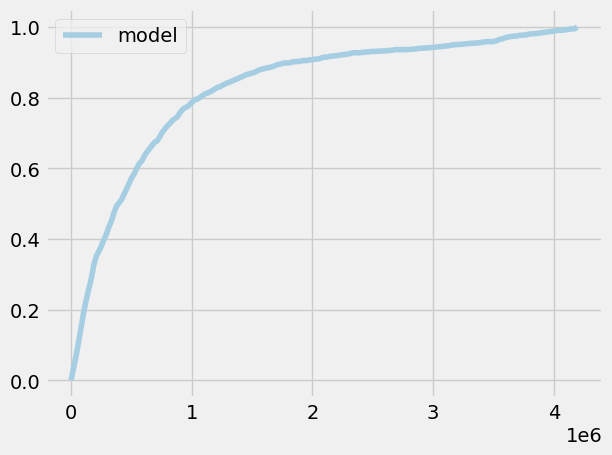



iteration =  3
131059/131059 [==============================] - 76s 582us/step
auc0.9449685334589273
mse0.02986637178661979
131059/131059 [==============================] - 78s 594us/step
model    0.838426
dtype: float64


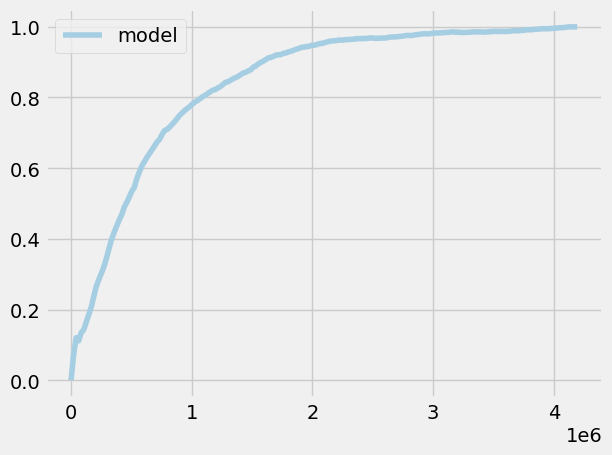



iteration =  4
131059/131059 [==============================] - 86s 653us/step
auc0.944694309073648
mse0.029922496758747724
131059/131059 [==============================] - 92s 699us/step
model    0.836097
dtype: float64


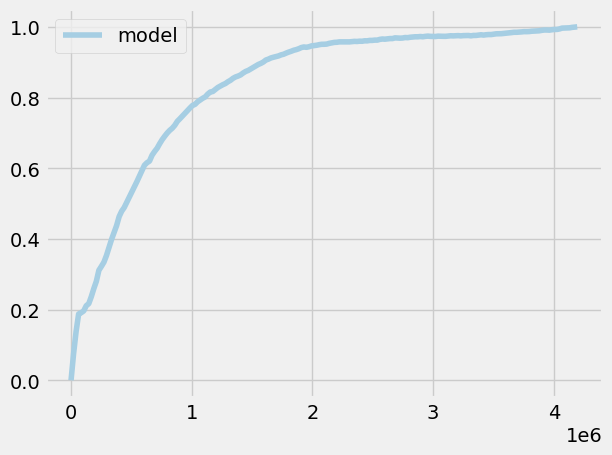



iteration =  5
131059/131059 [==============================] - 86s 658us/step
auc0.9454659663072882
mse0.029807047405807315
131059/131059 [==============================] - 86s 657us/step
model    0.839979
dtype: float64


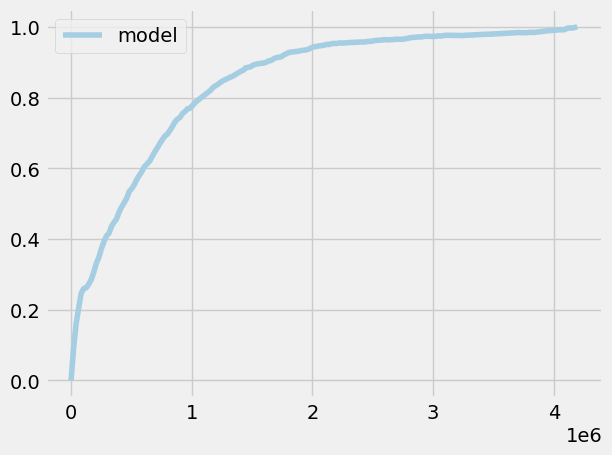



iteration =  6
131059/131059 [==============================] - 86s 656us/step
auc0.9451613808968855
mse0.02990489585443746
131059/131059 [==============================] - 86s 657us/step
model    0.833895
dtype: float64


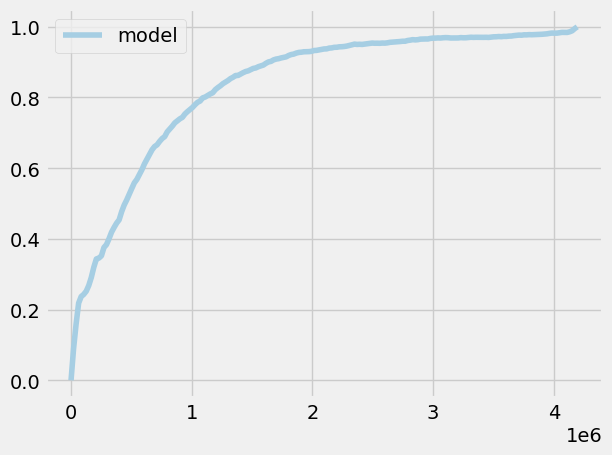



iteration =  7
131059/131059 [==============================] - 83s 634us/step
auc0.9446364351445042
mse0.02998825279647283
131059/131059 [==============================] - 86s 657us/step
model    0.844071
dtype: float64


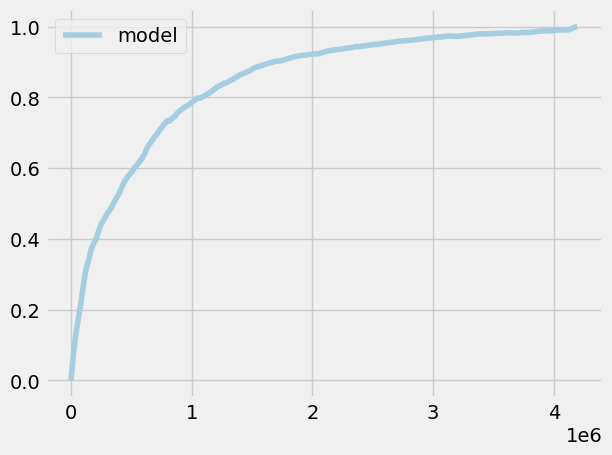



iteration =  8
131059/131059 [==============================] - 84s 644us/step
auc0.9446450790836356
mse0.029939330635213496
131059/131059 [==============================] - 89s 679us/step
model    0.831738
dtype: float64


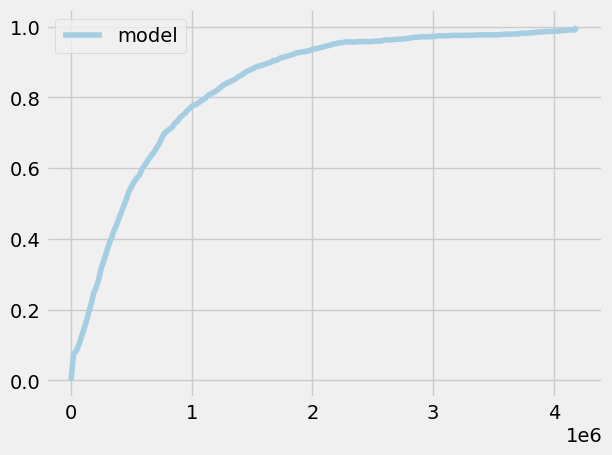



iteration =  9
131059/131059 [==============================] - 87s 667us/step
auc0.9432199720491031
mse0.030189915821918118
131059/131059 [==============================] - 85s 645us/step
model    0.842067
dtype: float64


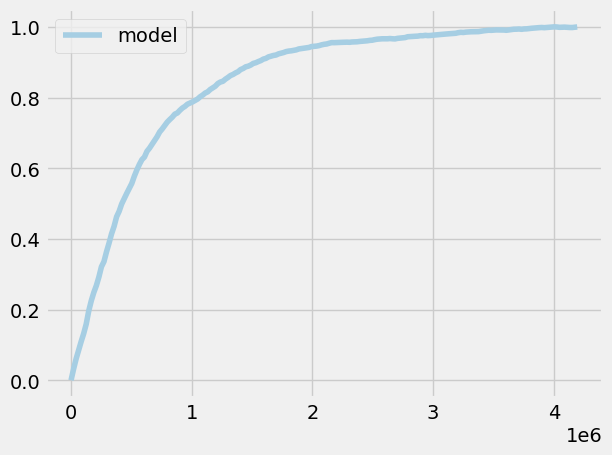



iteration =  10
131059/131059 [==============================] - 85s 649us/step
auc0.9442919556411246
mse0.02995856197086062
131059/131059 [==============================] - 86s 659us/step
model    0.841475
dtype: float64


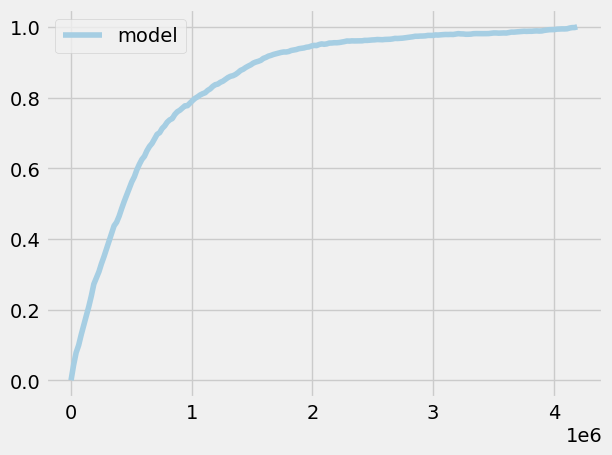



iteration =  11
131059/131059 [==============================] - 85s 645us/step
auc0.9448386875318122
mse0.029955550371084685
131059/131059 [==============================] - 87s 665us/step
model    0.833953
dtype: float64


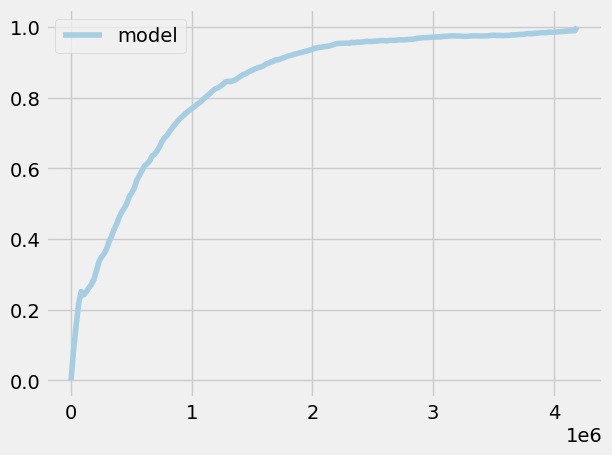



iteration =  12
131059/131059 [==============================] - 87s 661us/step
auc0.9448593457351324
mse0.02992544518215319
131059/131059 [==============================] - 85s 646us/step
model    0.832544
dtype: float64


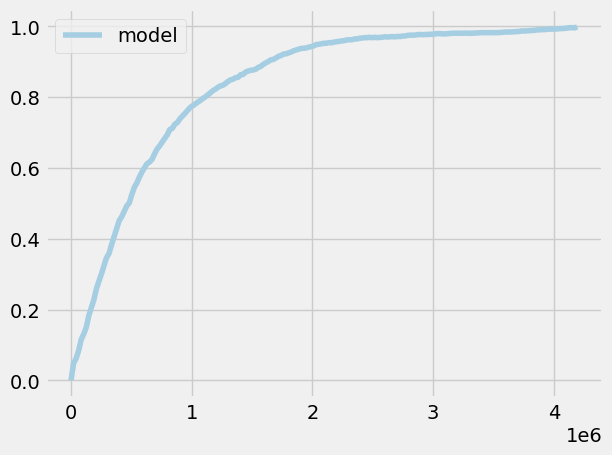



iteration =  13
131059/131059 [==============================] - 85s 645us/step
auc0.9454109906790633
mse0.029827896858468986
131059/131059 [==============================] - 87s 664us/step
model    0.839808
dtype: float64


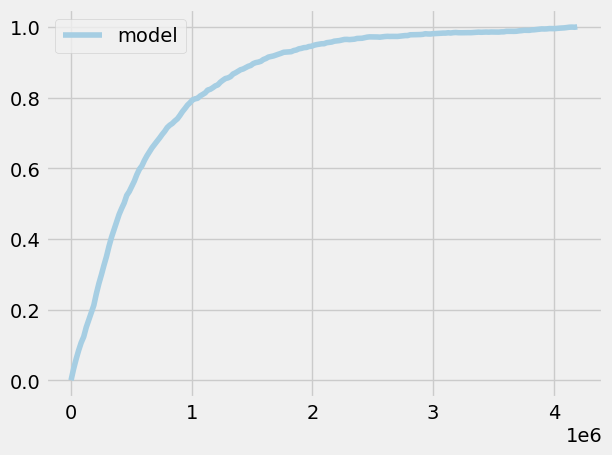



iteration =  14
131059/131059 [==============================] - 85s 645us/step
auc0.9435931740610685
mse0.030163659704355684
131059/131059 [==============================] - 87s 667us/step
model    0.841477
dtype: float64


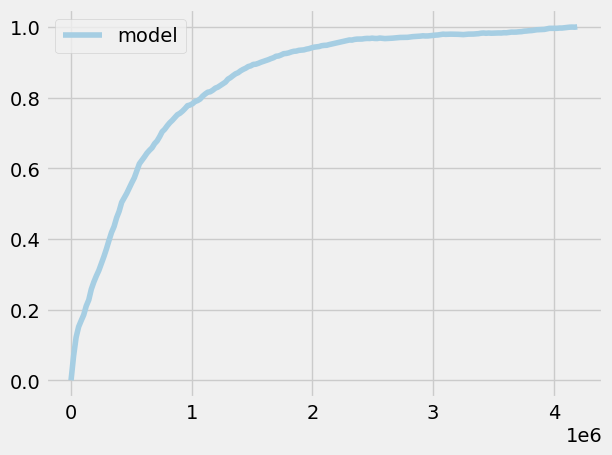



iteration =  15
131059/131059 [==============================] - 84s 643us/step
auc0.9443090719524363
mse0.029933065330499324
131059/131059 [==============================] - 88s 675us/step
model    0.841207
dtype: float64


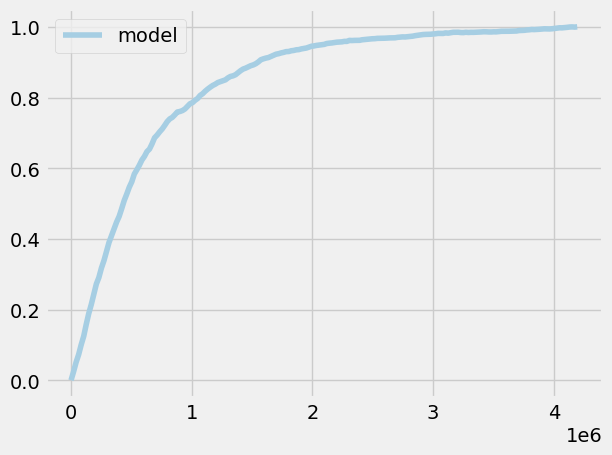



iteration =  16
131059/131059 [==============================] - 87s 667us/step
auc0.9435260304672619
mse0.030160481421280246
131059/131059 [==============================] - 85s 649us/step
model    0.840437
dtype: float64


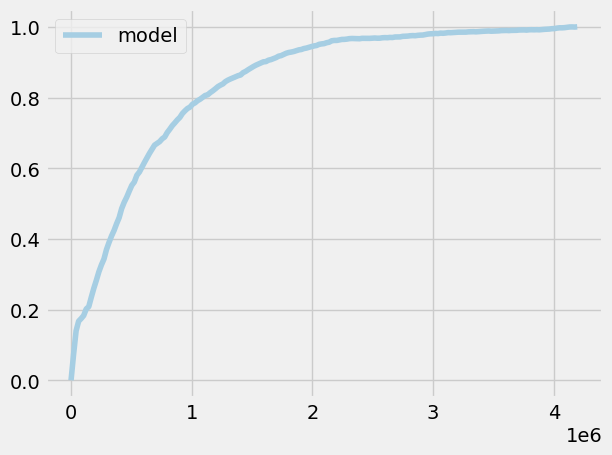



iteration =  17
131059/131059 [==============================] - 85s 649us/step
auc0.9435232449983004
mse0.030175874722472792
131059/131059 [==============================] - 85s 652us/step
model    0.842655
dtype: float64


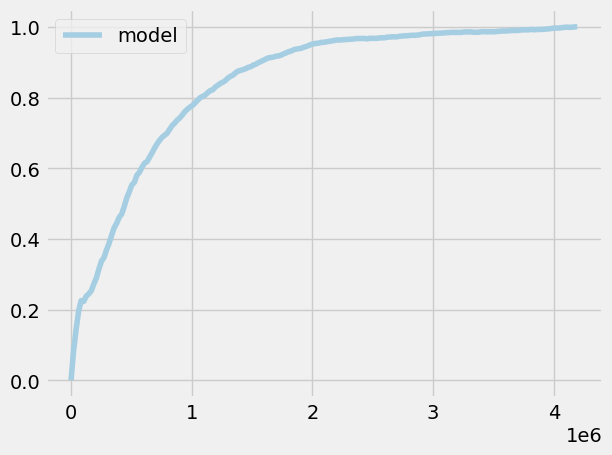



iteration =  18
131059/131059 [==============================] - 86s 656us/step
auc0.9451990162554508
mse0.02986648640359833
131059/131059 [==============================] - 88s 672us/step
model    0.844897
dtype: float64


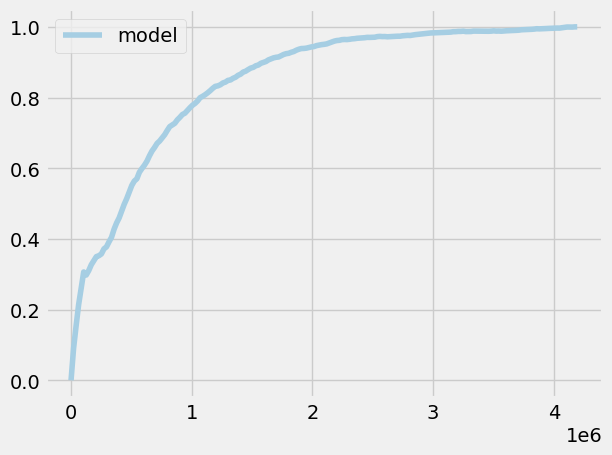



iteration =  19
131059/131059 [==============================] - 87s 665us/step
auc0.945480503374017
mse0.02982474339102628
131059/131059 [==============================] - 88s 672us/step
model    0.791103
dtype: float64


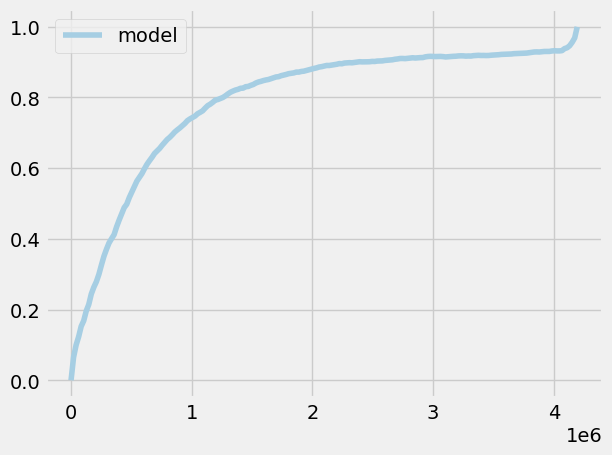



iteration =  20
131059/131059 [==============================] - 85s 650us/step
auc0.9435228314618695
mse0.030123479876039132
131059/131059 [==============================] - 85s 647us/step
model    0.842828
dtype: float64


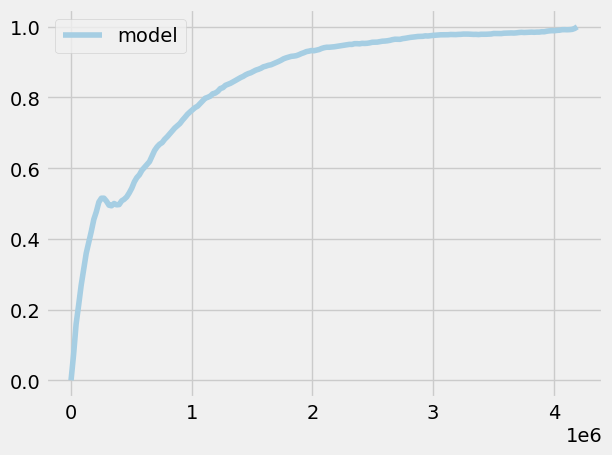

In [ ]:
import sklearn 
import sklearn.metrics

slearner_causalml_auuc_list = []

for i in range(count):
    
    print("iteration = ", i + 1)
    
    final_model = get_slearner_criteo_model()
    final_model.load_weights('../model_file/uplift/criteo/final_model/slearner/slearner_criteo_model_{}.h5'.format(i+1))
    Y_pre = final_model.predict([X_test, T_test])
    fpr, tpr, thresholds = sklearn.metrics.roc_curve(Y_visit_test, Y_pre)
    print("auc"+str(sklearn.metrics.auc(fpr, tpr)))
    print("mse"+str(sklearn.metrics.mean_squared_error(Y_visit_test, Y_pre)))
    
    # creates two sets of predictions: one with treatment T0 (all zeros) and one with treatment T1 (all ones).
    # The difference between these two sets of predictions gives the estimated Individual Treatment Effects (ITE) for each instance.
    T0 = np.zeros(shape=T_test.shape)
    T1 = np.ones(shape=T_test.shape)

    p0 = final_model.predict([X_test,  T0])
    p1 = final_model.predict([X_test,  T1])

    # ITE = p1 - p0
    slearner_pre = p1 - p0
    
    slearner_causalml_auuc = get_causalml_auuc(Y=Y_visit_test, T=T_test, ite_pred=slearner_pre)
    slearner_causalml_auuc_list.append(slearner_causalml_auuc)
    
    print("\n")


trainable_weights
p1_hidden_1/kernel:0
p1_hidden_1/bias:0
p1_hidden_2/kernel:0
p1_hidden_2/bias:0
p1/kernel:0
p1/bias:0
non_trainable_weights
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 p0_raw_features (InputLaye  [(None, 12)]              0         
 r)                                                              
                                                                 
 p1_hidden_1 (Dense)         (None, 8)                 104       
                                                                 
 p1_hidden_2 (Dense)         (None, 4)                 36        
                                                                 
 p1 (Dense)                  (None, 1)                 5         
                                                                 
Total params: 145 (580.00 Byte)
Trainable params: 145 (580.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_____________

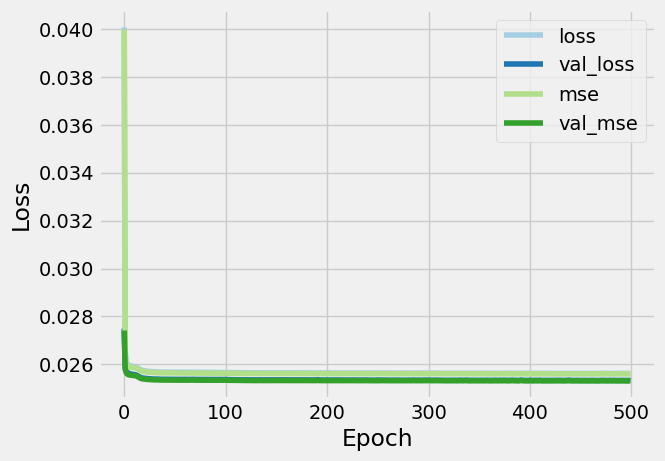

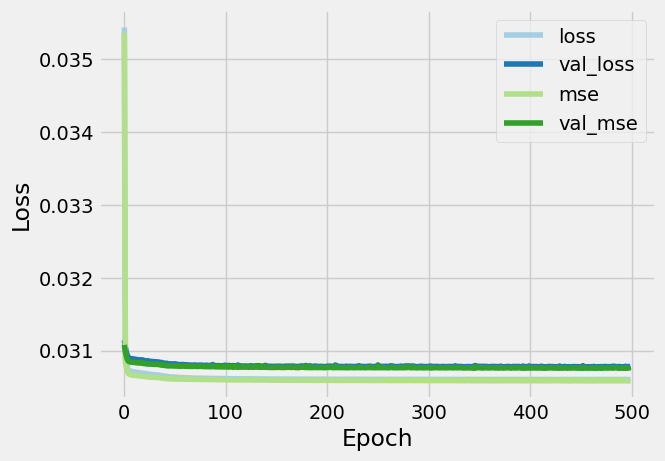



iteration =  2
305804/305804 [==============================] - 179s 584us/step


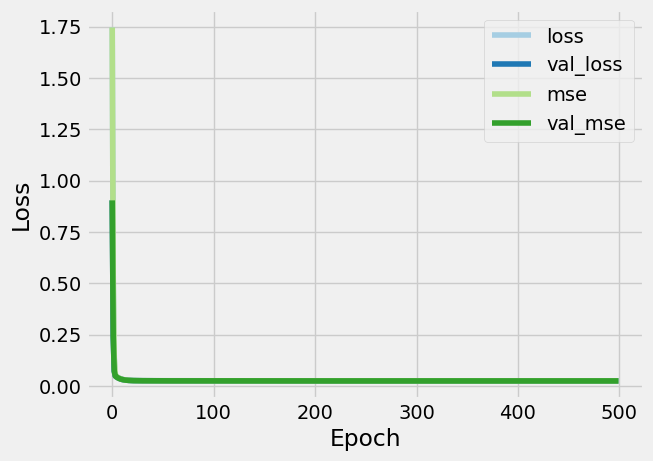

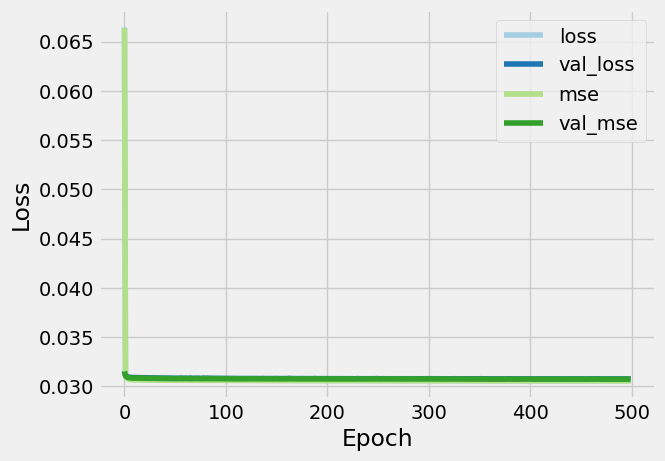



iteration =  3
305804/305804 [==============================] - 178s 582us/step


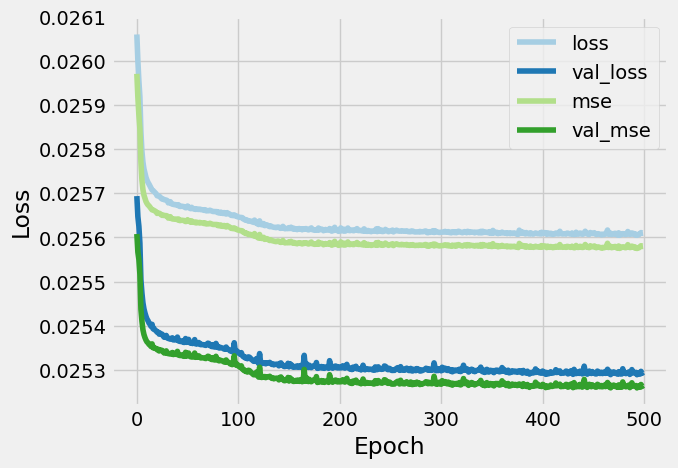

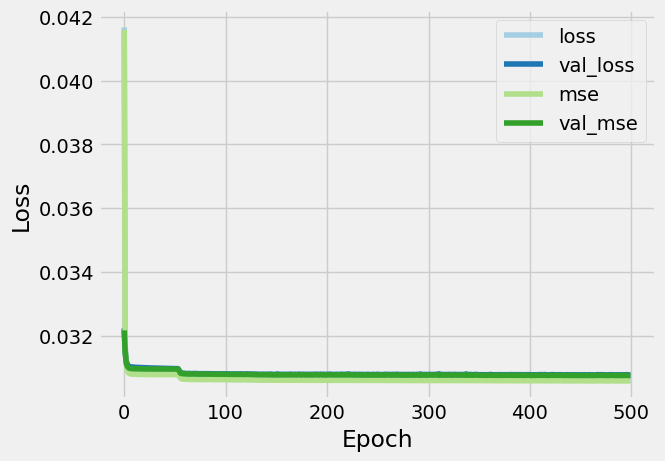



iteration =  4
305804/305804 [==============================] - 173s 566us/step


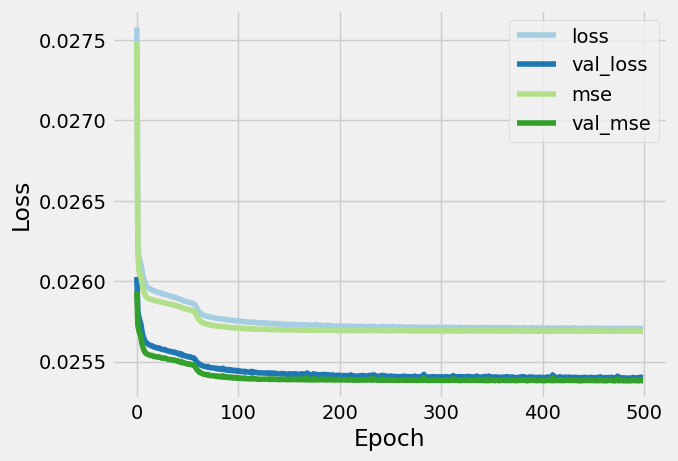

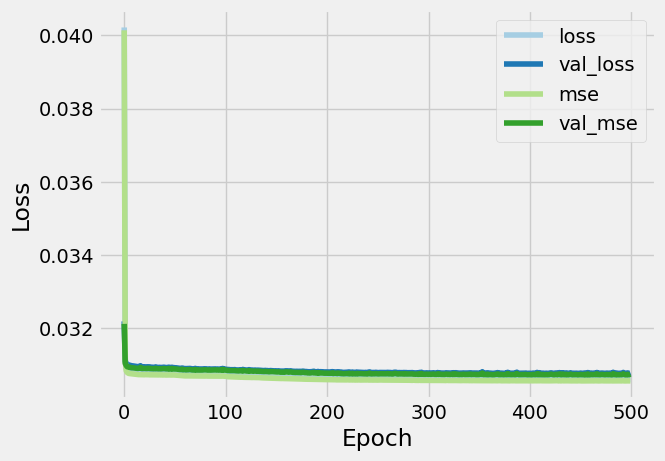



iteration =  5
305804/305804 [==============================] - 181s 591us/step


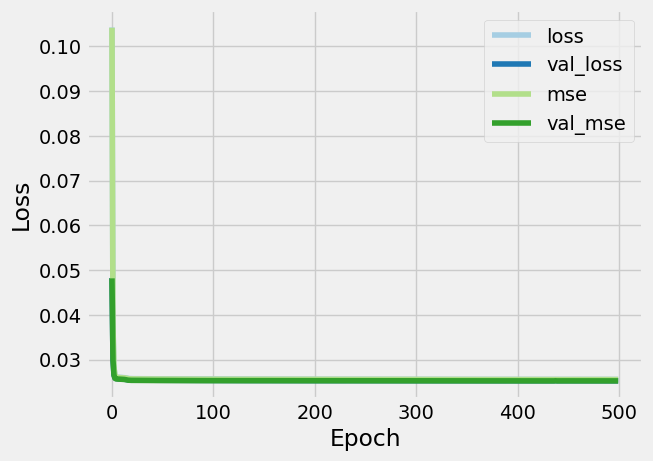

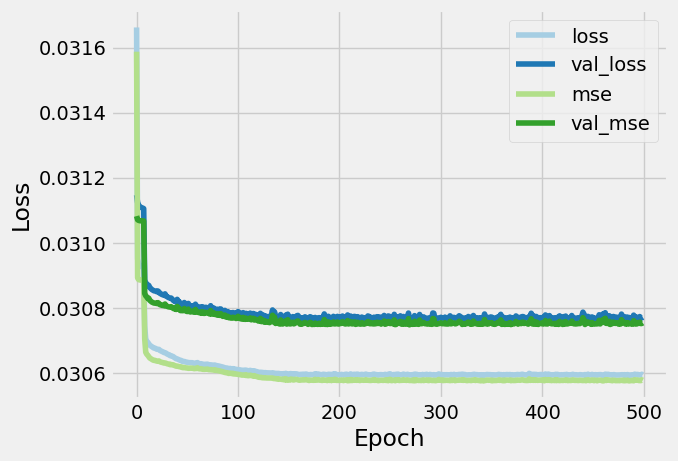



iteration =  6
305804/305804 [==============================] - 188s 615us/step


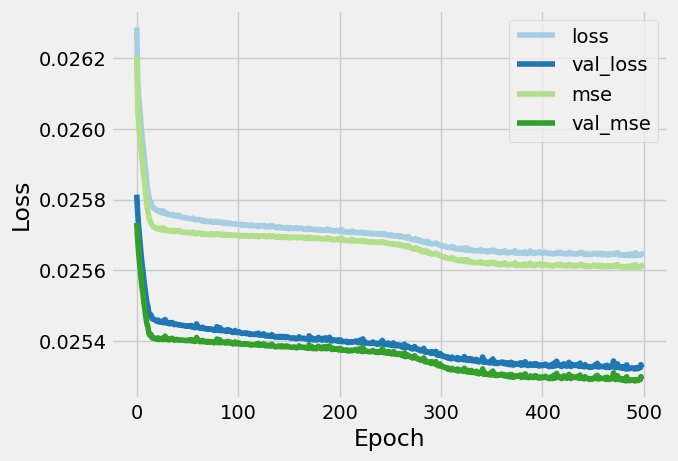

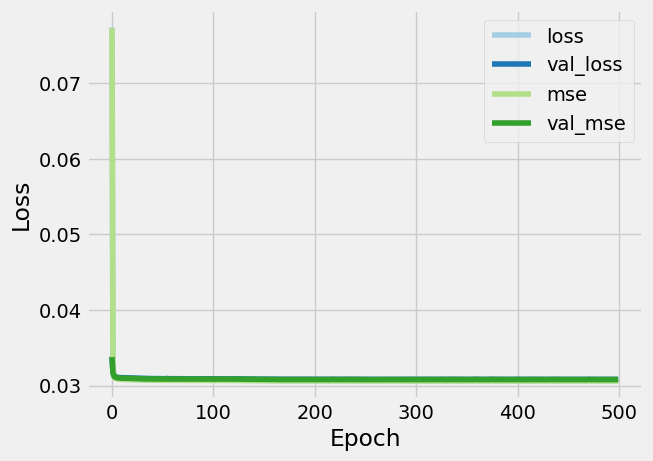



iteration =  7
305804/305804 [==============================] - 186s 607us/step


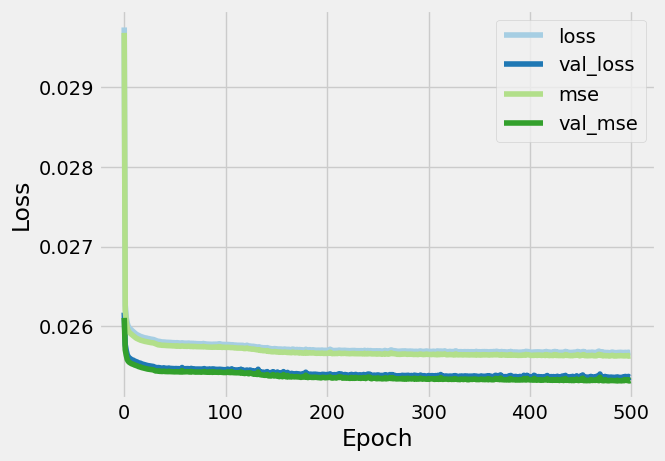

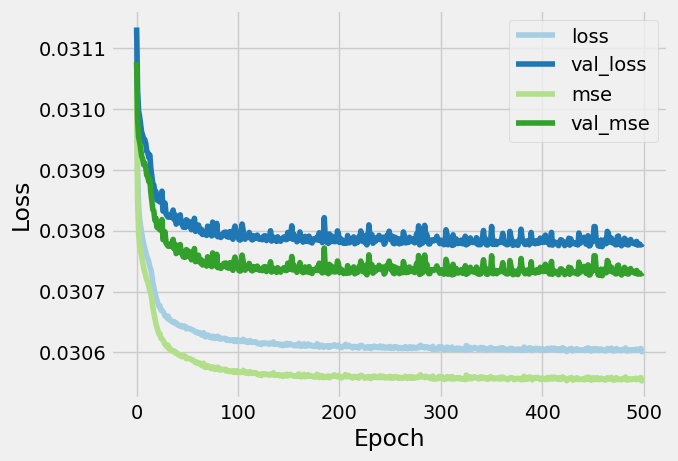



iteration =  8
305804/305804 [==============================] - 211s 691us/step


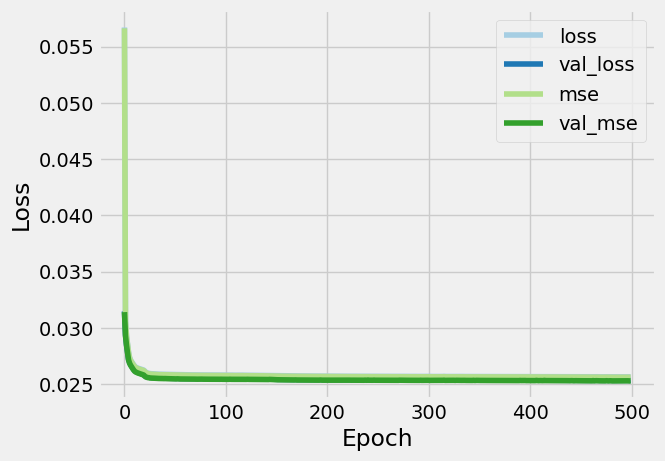

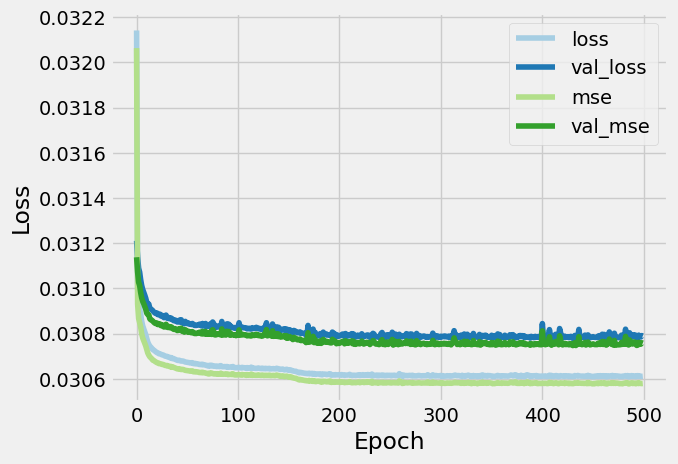



iteration =  9
305804/305804 [==============================] - 184s 601us/step


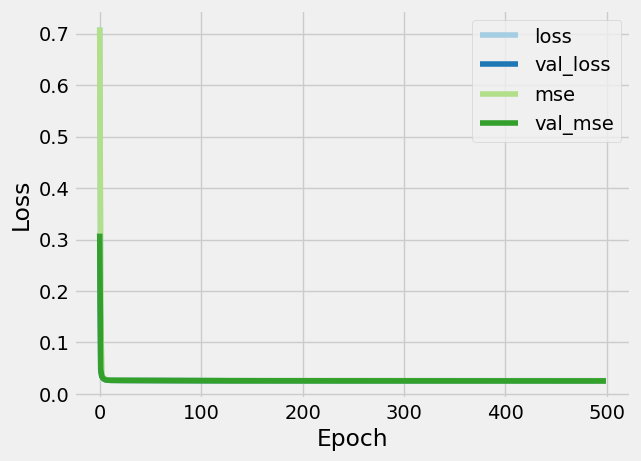

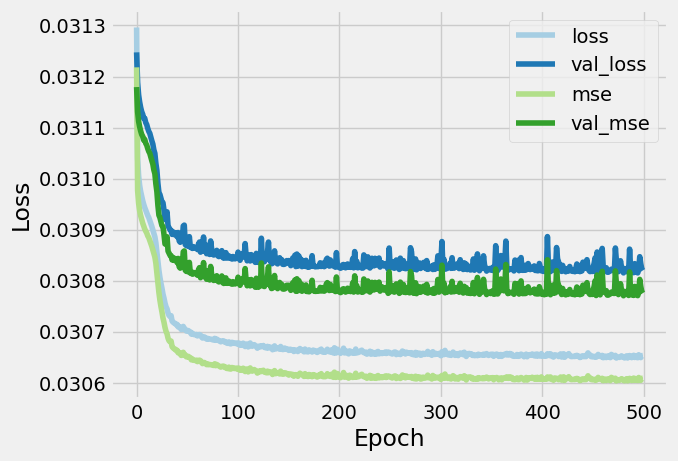



iteration =  10
305804/305804 [==============================] - 172s 561us/step


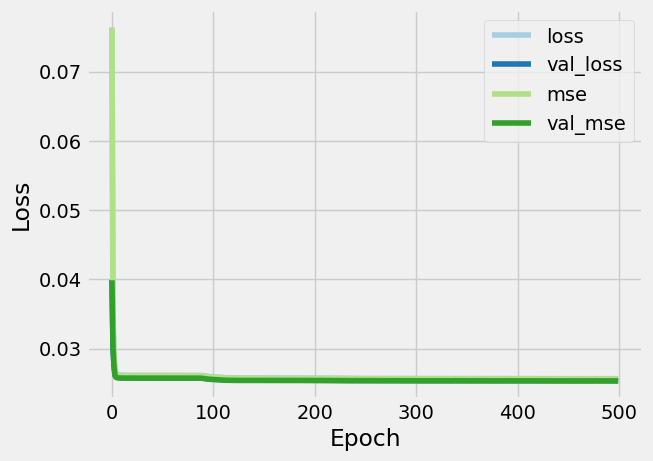

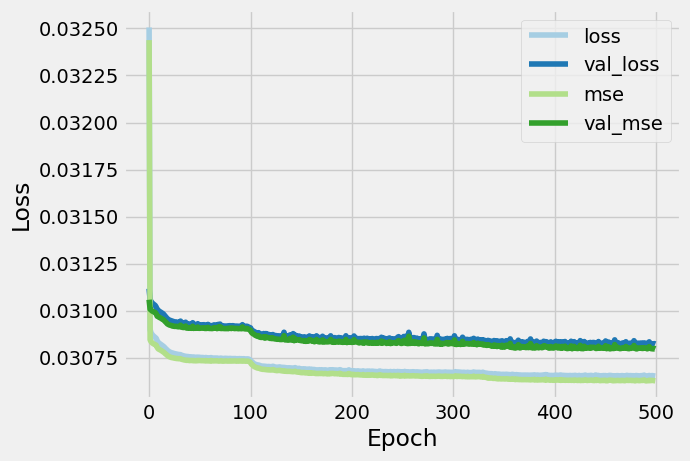



iteration =  11
305804/305804 [==============================] - 176s 576us/step


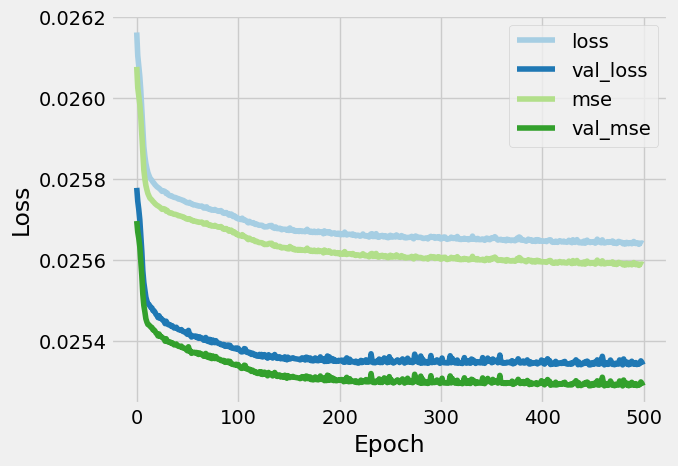

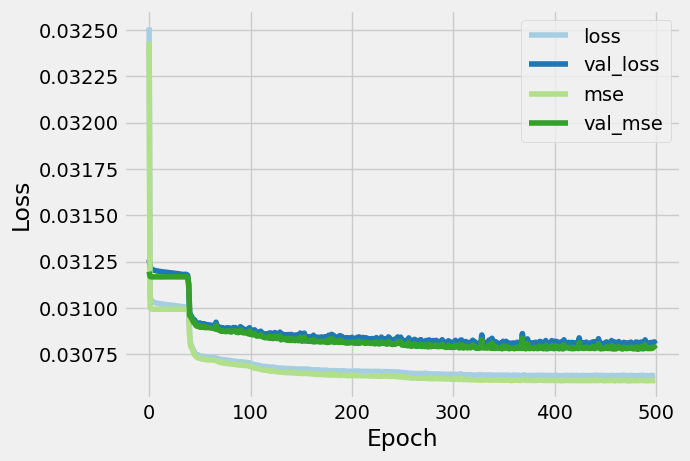



iteration =  12
305804/305804 [==============================] - 175s 571us/step


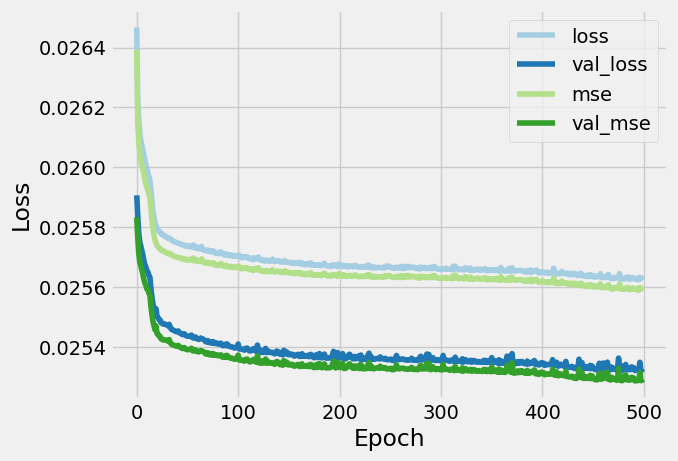

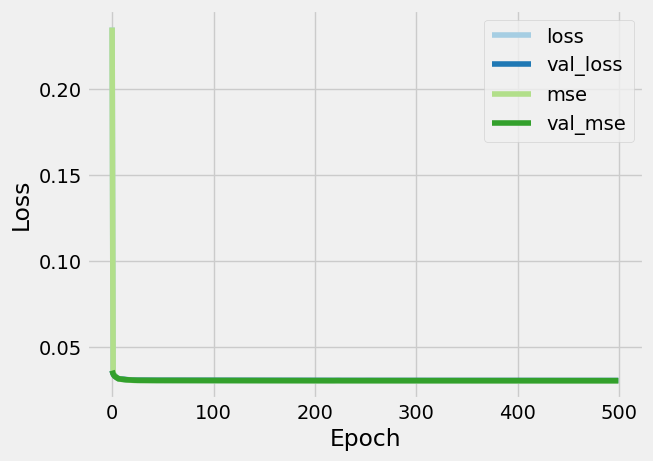



iteration =  13
305804/305804 [==============================] - 173s 566us/step


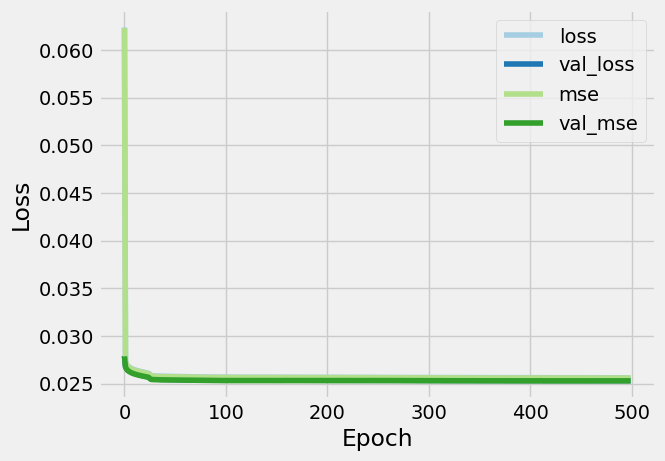

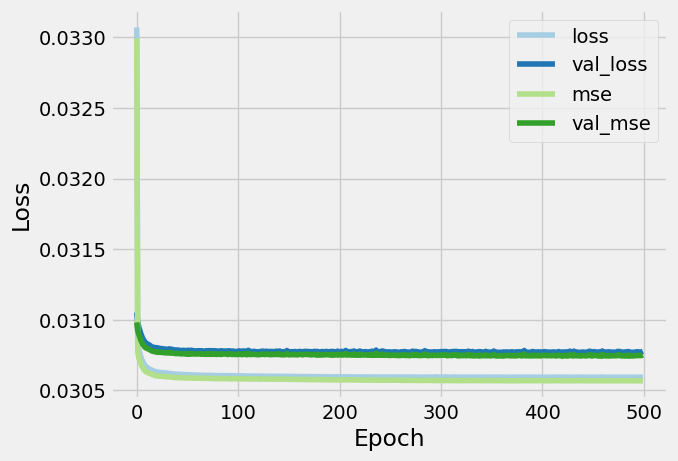



iteration =  14
305804/305804 [==============================] - 176s 575us/step


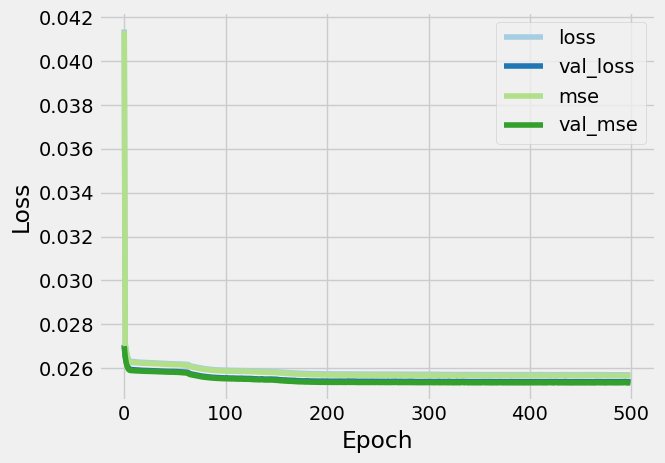

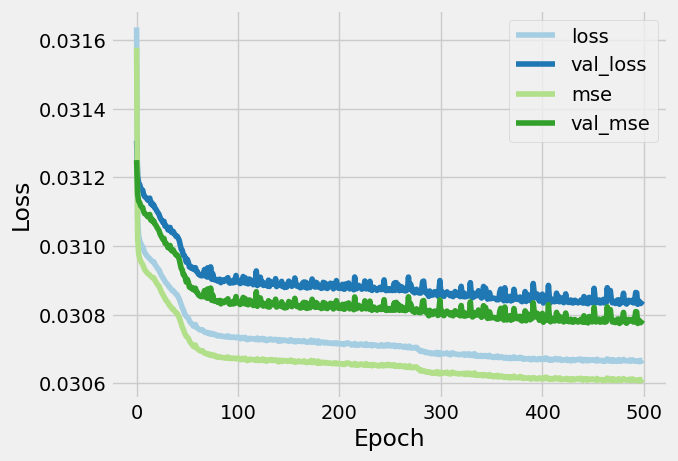



iteration =  15
305804/305804 [==============================] - 188s 613us/step


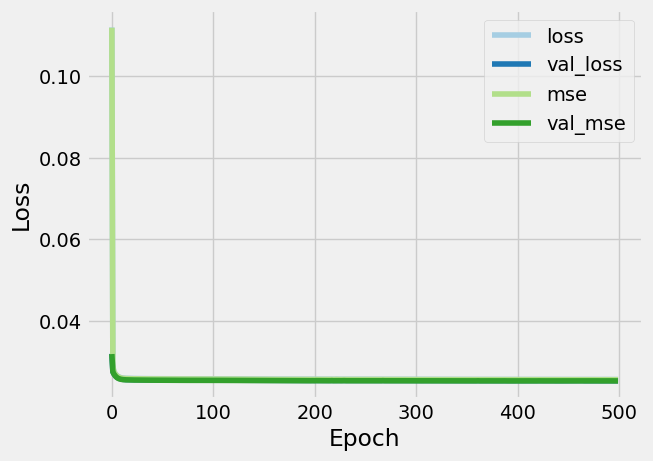

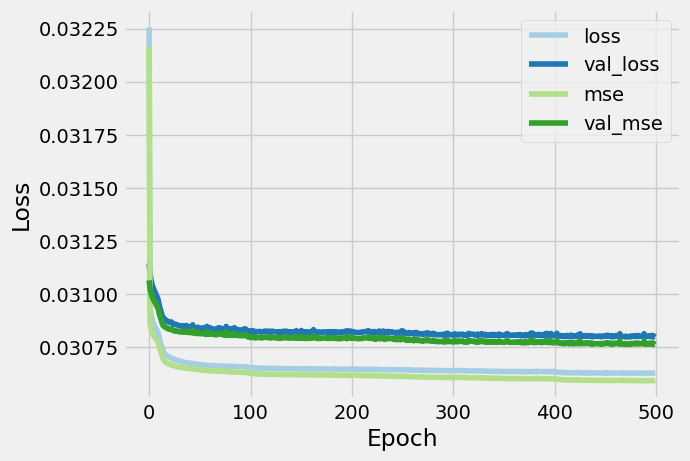



iteration =  16
305804/305804 [==============================] - 180s 589us/step


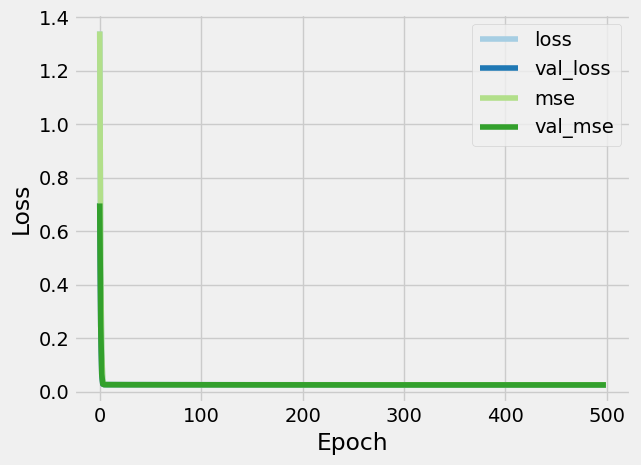

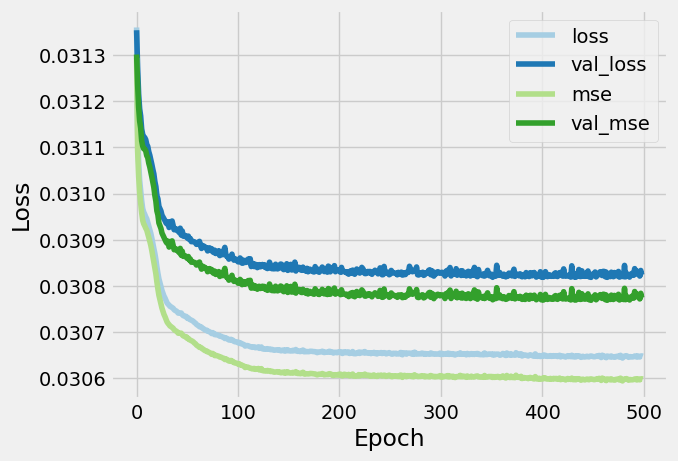



iteration =  17
305804/305804 [==============================] - 176s 576us/step


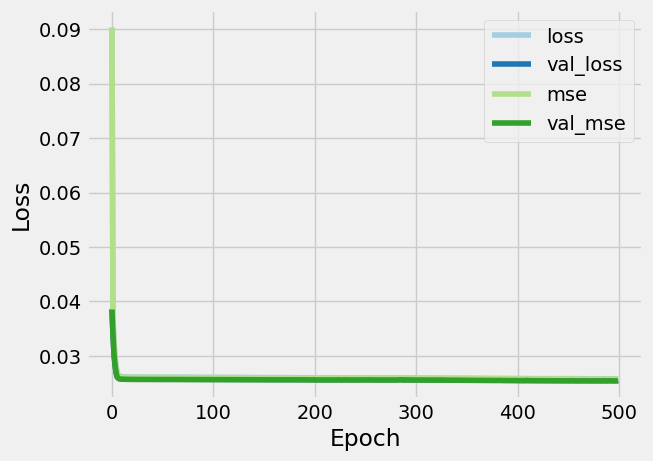

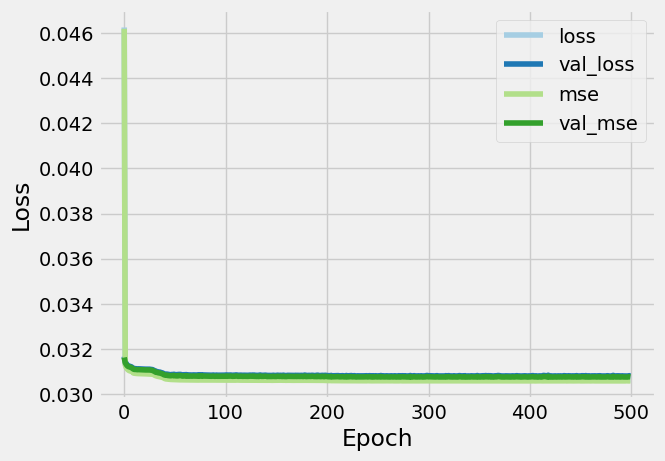



iteration =  18
305804/305804 [==============================] - 179s 585us/step


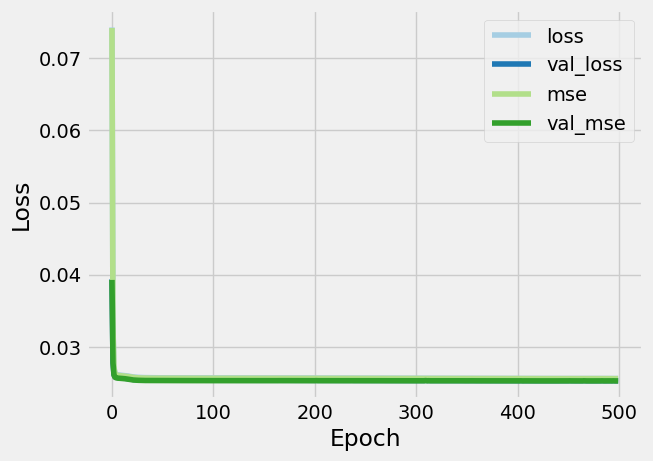

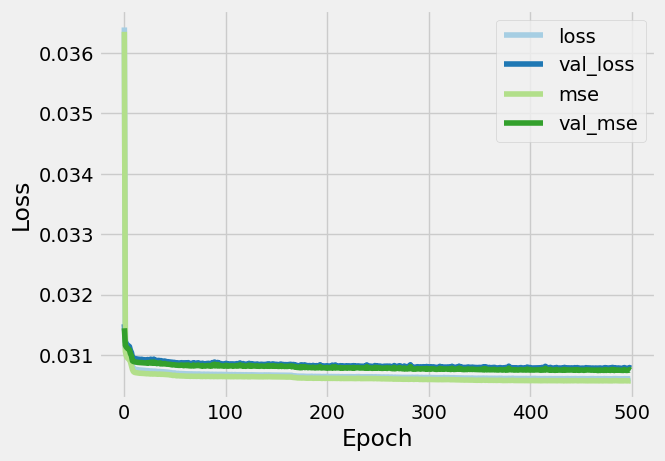



iteration =  19
305804/305804 [==============================] - 171s 558us/step


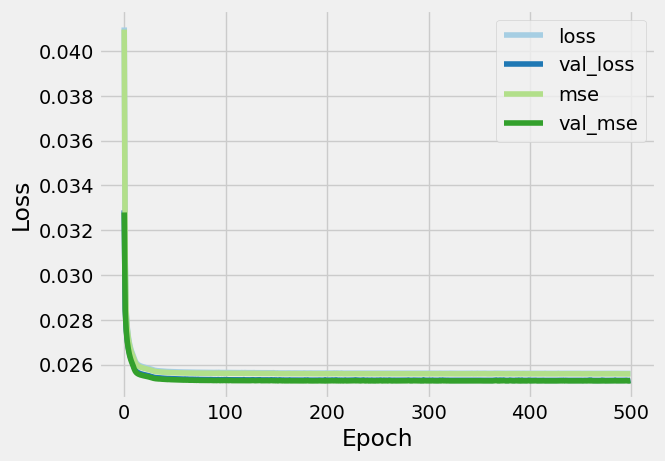

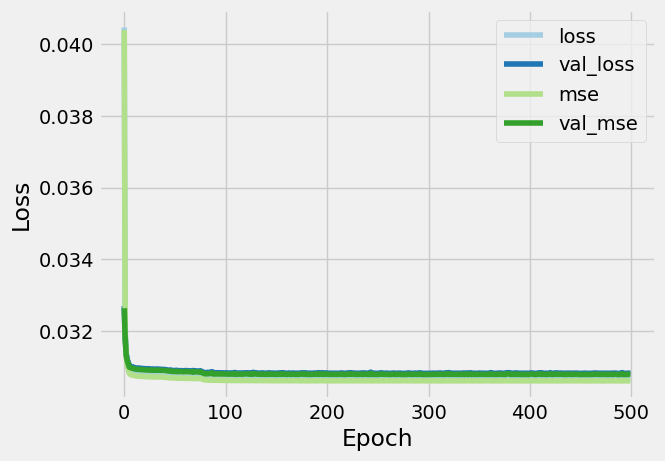



iteration =  20
305804/305804 [==============================] - 190s 622us/step


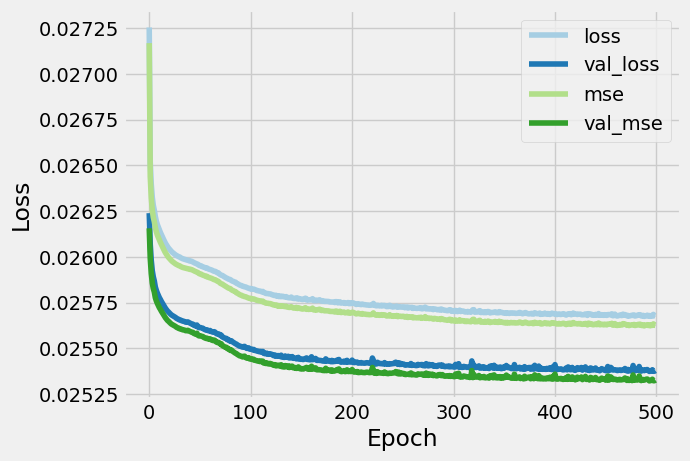

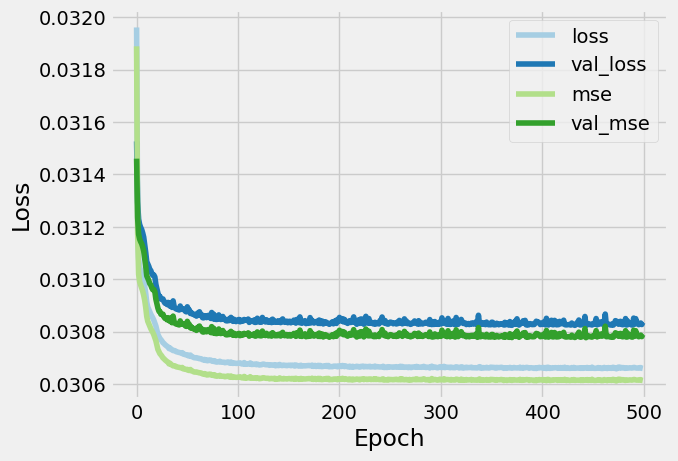

In [15]:
# X LEARNER MODEL
import keras
import keras.backend as K
import tensorflow as tf
from keras.callbacks import LearningRateScheduler
from keras.callbacks import ReduceLROnPlateau
from model.uplift_model import *
import os


final_model = get_xlearner_criteo_model()
final_model.compile(loss='mse', optimizer='adam', metrics=['mse'])
#lambda y_true,y_pred: y_pred
print('trainable_weights')
for x in final_model.trainable_weights:
    print(x.name)
print('non_trainable_weights')
for x in final_model.non_trainable_weights:
    print(x.name)
final_model.summary()

model_save_dir = "../model_file/uplift/criteo/final_model/xlearner"

# Ensure the directory exists
os.makedirs(model_save_dir, exist_ok=True)

for i in range(count):
    
    print("iteration = ", i + 1)
    
    final_model = get_slearner_criteo_model()
    final_model.load_weights('../model_file/uplift/criteo/final_model/slearner/slearner_criteo_model_{}.h5'.format(i+1))
    T0 = np.zeros(shape=T_train.shape)
    T1 = np.ones(shape=T_train.shape)
    p0 = final_model.predict([X_train,  T0])
    p1 = final_model.predict([X_train,  T1])
    
    X_train_0 = X_train[(T_train.flatten() < 0.5), :]
    X_train_1 = X_train[(T_train.flatten() >= 0.5), :]

    X_train_0_p1_pre = p1[(T_train < 0.5)]
    X_train_1_p0_pre = p0[(T_train >= 0.5)]

    Y_visit_train_0 = Y_visit_train[(T_train < 0.5)]
    Y_visit_train_1 = Y_visit_train[(T_train >= 0.5)]

    tau_0_label = X_train_0_p1_pre - Y_visit_train_0
    tau_1_label = Y_visit_train_1 - X_train_1_p0_pre
    
    
    final_model = get_xlearner_criteo_model()
    final_model.compile(loss='mse', optimizer='adam', metrics=['mse'])

    mcp_save = ModelCheckpoint(os.path.join(model_save_dir, f'xlearner_criteo_model_tau_0_{i+1}.h5'), save_best_only=True, monitor='val_loss', mode='min', save_weights_only=True)
    history = final_model.fit(X_train_0, tau_0_label, validation_split=0.2, epochs=500, batch_size=32688, shuffle=True, verbose=0, callbacks=[mcp_save])

    plot_loss(history, "loss", "val_loss", "mse", "val_mse")
    
    
    final_model = get_xlearner_criteo_model()
    final_model.compile(loss='mse', optimizer='adam', metrics=['mse'])

    mcp_save = ModelCheckpoint(os.path.join(model_save_dir, f'xlearner_criteo_model_tau_1_{i+1}.h5'), save_best_only=True, monitor='val_loss', mode='min', save_weights_only=True)
    history = final_model.fit(X_train_1, tau_1_label, validation_split=0.2, epochs=500, batch_size=32688, shuffle=True, verbose=0, callbacks=[mcp_save])

    plot_loss(history, "loss", "val_loss", "mse", "val_mse")
    
    print("\n")
    


iteration =  1
131059/131059 [==============================] - 80s 611us/step
model    0.847218
dtype: float64


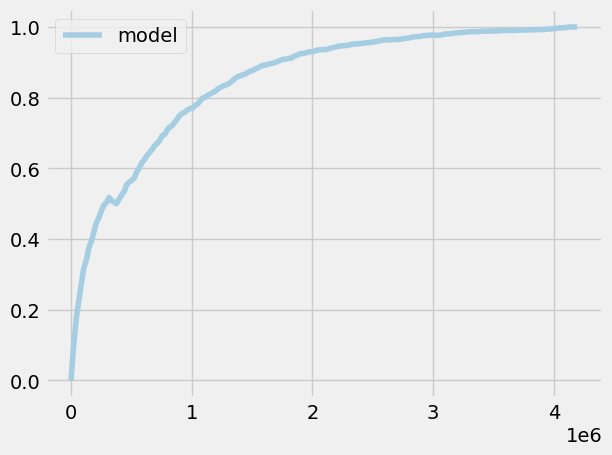



iteration =  2
131059/131059 [==============================] - 80s 613us/step
model    0.847655
dtype: float64


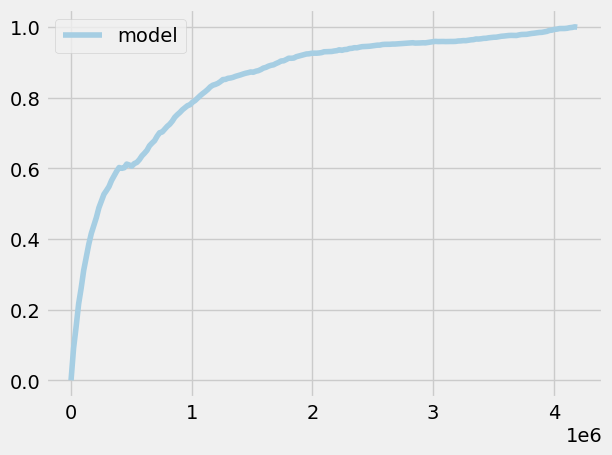



iteration =  3
131059/131059 [==============================] - 68s 517us/step
model    0.837223
dtype: float64


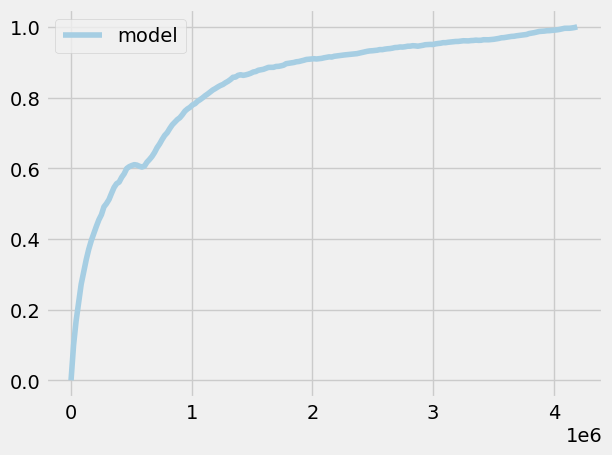



iteration =  4
131059/131059 [==============================] - 70s 533us/step
model    0.839708
dtype: float64


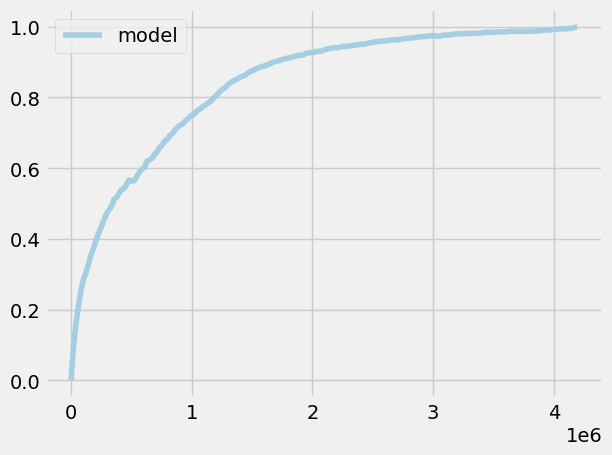



iteration =  5
131059/131059 [==============================] - 70s 533us/step
model    0.845586
dtype: float64


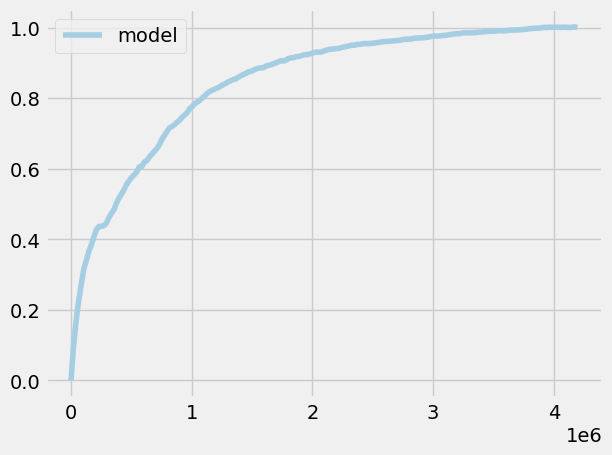



iteration =  6
131059/131059 [==============================] - 70s 532us/step
model    0.843356
dtype: float64


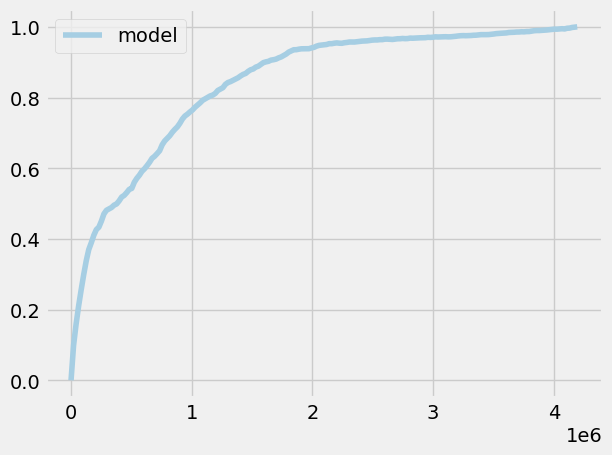



iteration =  7
131059/131059 [==============================] - 70s 537us/step
model    0.866957
dtype: float64


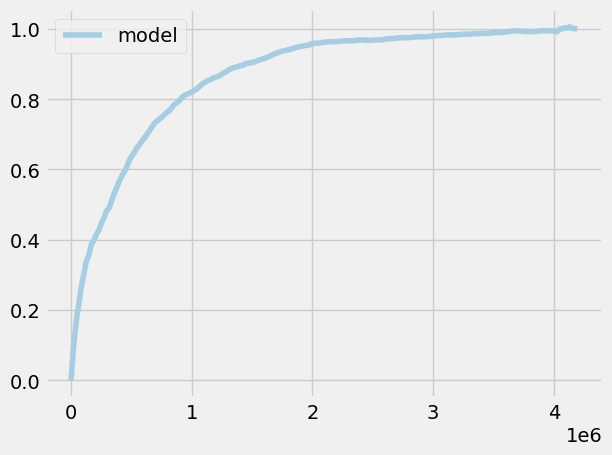



iteration =  8
131059/131059 [==============================] - 70s 535us/step
model    0.849963
dtype: float64


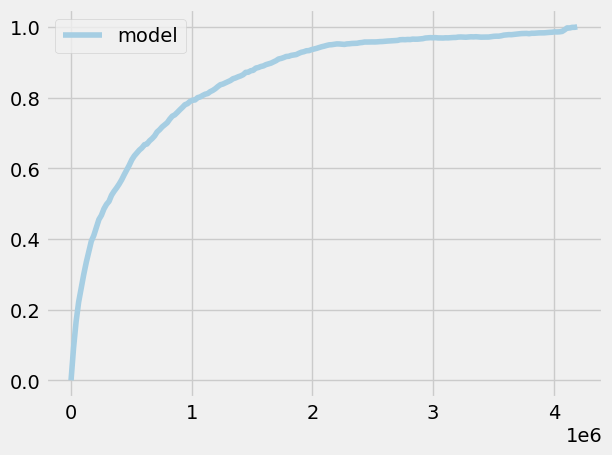



iteration =  9
131059/131059 [==============================] - 72s 550us/step
model    0.834141
dtype: float64


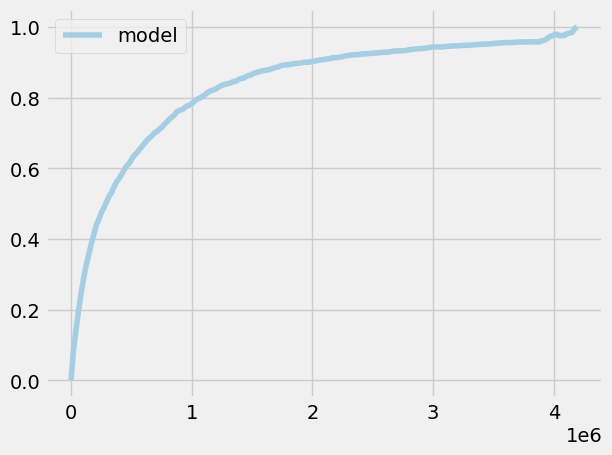



iteration =  10
131059/131059 [==============================] - 73s 554us/step
model    0.832859
dtype: float64


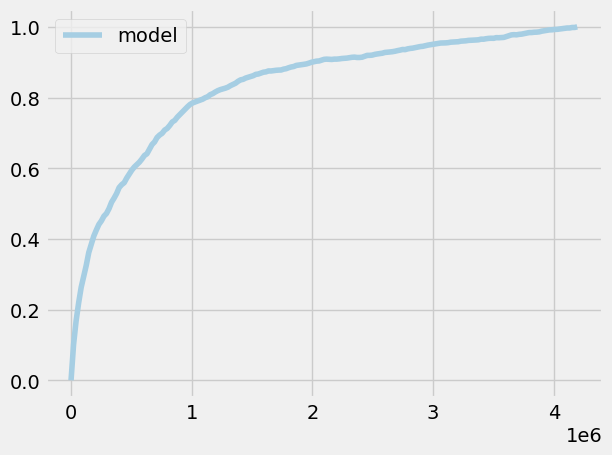



iteration =  11
131059/131059 [==============================] - 71s 541us/step
model    0.840193
dtype: float64


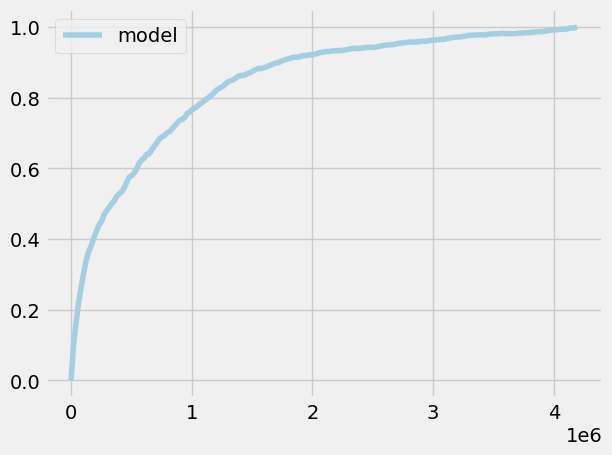



iteration =  12
131059/131059 [==============================] - 71s 542us/step
model    0.868869
dtype: float64


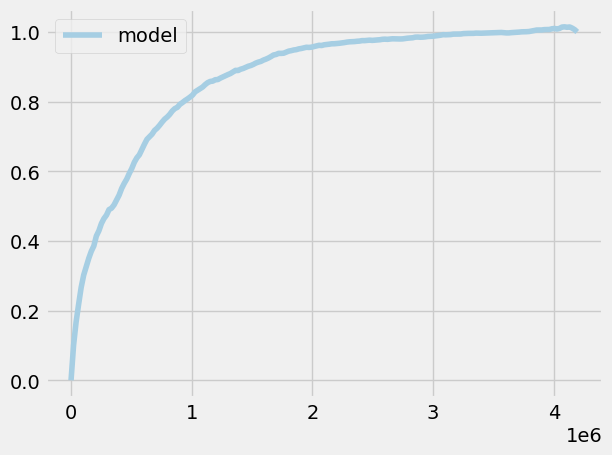



iteration =  13
131059/131059 [==============================] - 71s 544us/step
model    0.855191
dtype: float64


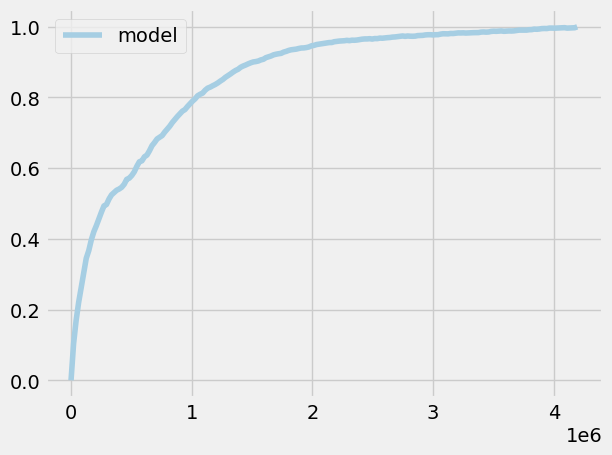



iteration =  14
131059/131059 [==============================] - 72s 547us/step
model    0.85534
dtype: float64


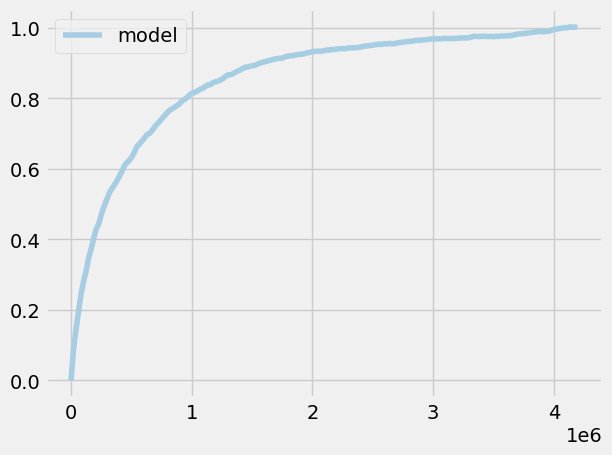



iteration =  15
131059/131059 [==============================] - 72s 546us/step
model    0.844382
dtype: float64


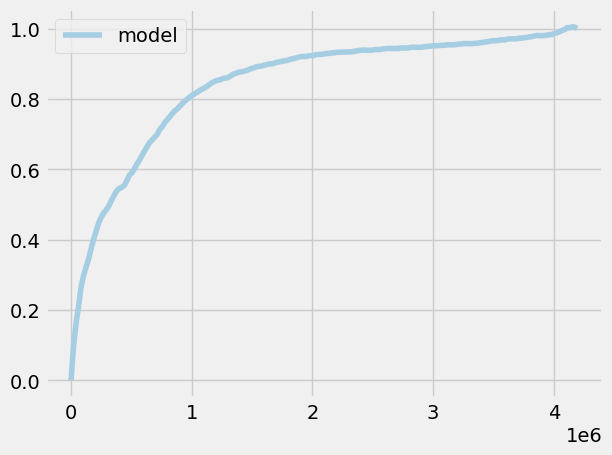



iteration =  16
131059/131059 [==============================] - 70s 533us/step
model    0.830194
dtype: float64


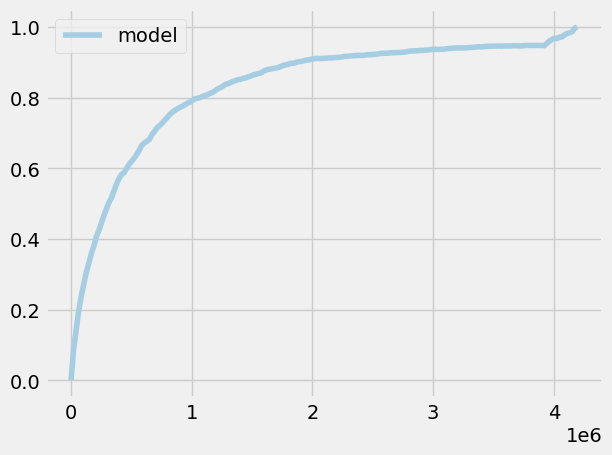



iteration =  17
131059/131059 [==============================] - 72s 547us/step
model    0.846125
dtype: float64


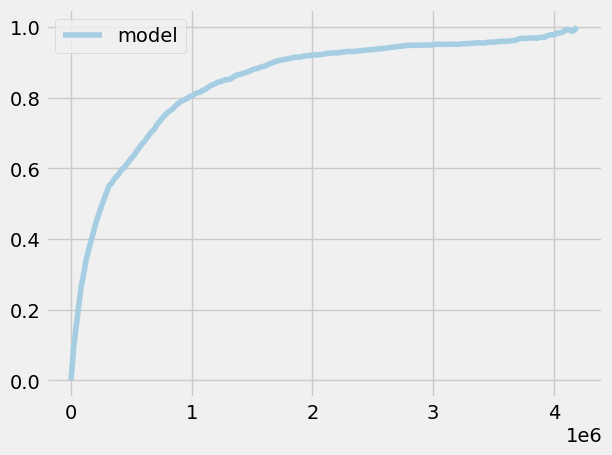



iteration =  18
131059/131059 [==============================] - 70s 535us/step
model    0.83878
dtype: float64


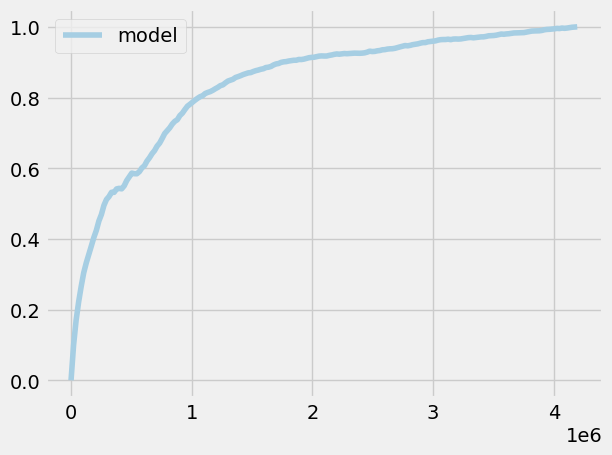



iteration =  19
131059/131059 [==============================] - 70s 535us/step
model    0.837628
dtype: float64


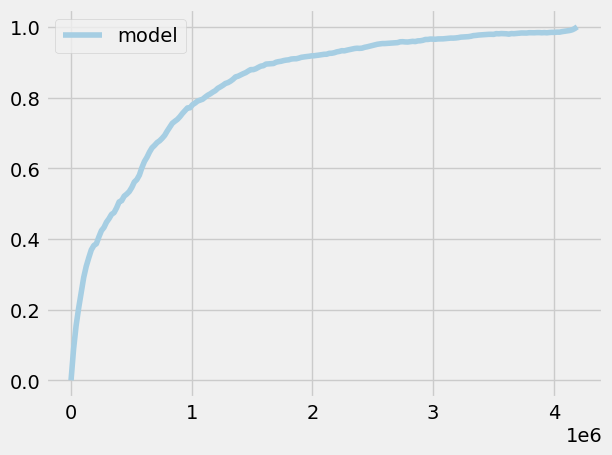



iteration =  20
131059/131059 [==============================] - 70s 531us/step
model    0.839732
dtype: float64


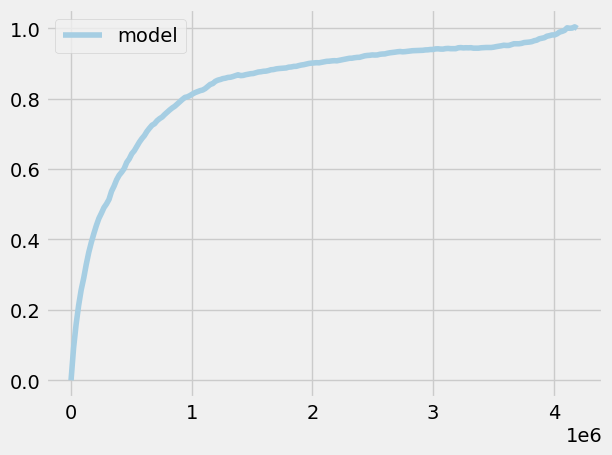

In [16]:
import sklearn 
import sklearn.metrics

xlearner_causalml_auuc_list = []

for i in range(count):
    
    print("iteration = ", i + 1)
    
    
    final_model = get_xlearner_criteo_model()
    final_model.load_weights('../model_file/uplift/criteo/final_model/xlearner/xlearner_criteo_model_tau_0_{}.h5'.format(i+1))

    tau_0_pre = final_model.predict(X_test)

    final_model = get_xlearner_criteo_model()
    final_model.load_weights('../model_file/uplift/criteo/final_model/xlearner/xlearner_criteo_model_tau_1_{}.h5'.format(i+1))

    tau_1_pre = final_model.predict(X_test)

    ex = 0.85
    
    xlearner_tau_pre = ex * tau_0_pre + (1 - ex) * tau_1_pre

    xlearner_causalml_auuc = get_causalml_auuc(Y=Y_visit_test, T=T_test, ite_pred=xlearner_tau_pre)
    
    xlearner_causalml_auuc_list.append(xlearner_causalml_auuc)
    
    print("\n")

In [1]:
# GRF
from econml.dml import CausalForestDML
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.ensemble import GradientBoostingRegressor, GradientBoostingClassifier
from sklearn.dummy import DummyRegressor, DummyClassifier
import pickle
import os

grf_causalml_auuc_list = []

X_grf_train = X_train
T_grf_train = T_train.flatten()
Y_visit_grf_train = Y_visit_train.flatten()

X_grf_test = X_test
T_grf_test = T_test.flatten()
Y_visit_grf_test = Y_visit_test.flatten()

model_save_dir = "../model_file/uplift/criteo/final_model/grf"

# Ensure the directory exists
os.makedirs(model_save_dir, exist_ok=True)

for i in range(count):
    
    print("iteration = ", i + 1)
    
    depth = 16
    min_samples_leaf = 100
    n_estimators = 256

    grf_random_state = 20220723 + i * 11
    
    est_it = CausalForestDML(model_y=RandomForestClassifier(n_estimators=160, max_samples = 0.7, random_state=grf_random_state, max_depth=12, min_samples_leaf=500, n_jobs=32),
                          model_t=RandomForestClassifier(n_estimators=160, max_samples = 0.7, random_state=grf_random_state, max_depth=12, min_samples_leaf=500, n_jobs=32),
                          discrete_outcome=True, # attention, add by myself
                          discrete_treatment=True,
                          cv=3,
                          n_estimators=n_estimators,
                          n_jobs=32,
                          max_depth=depth,
                          min_samples_leaf = min_samples_leaf,
                          random_state=grf_random_state)

    est_it.fit(Y_visit_grf_train, T_grf_train, X=X_grf_train, cache_values=True)
    
    model_file = "../model_file/uplift/criteo/final_model/grf/CausalForestDML_{}.model".format(i + 1)
    
    fw = open(model_file, "wb")

    pickle.dump(est_it, fw)

    fw.close()
    
    
    grf_test_pre = est_it.effect(X_grf_test)
    
    grf_causalml_auuc = get_causalml_auuc(Y=Y_visit_grf_test, T=T_grf_test, ite_pred=grf_test_pre)
    
    grf_causalml_auuc_list.append(grf_causalml_auuc)
    
    print("\n")
    

NameError: name 'X_train' is not defined

model     0.852453
Random    0.501867
dtype: float64


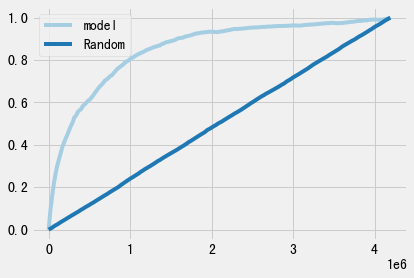

model     0.848431
Random    0.501867
dtype: float64


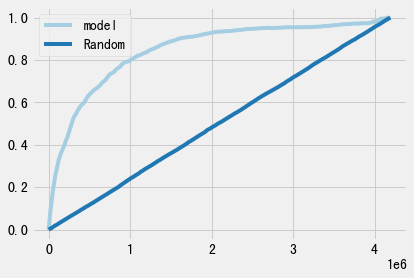

model     0.847099
Random    0.501867
dtype: float64


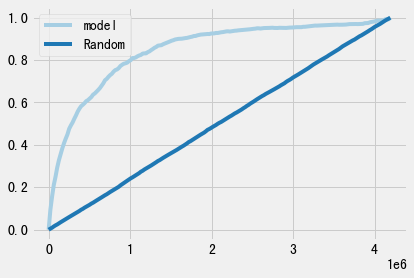

model     0.846916
Random    0.501867
dtype: float64


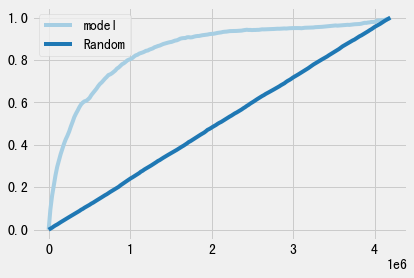

model     0.850972
Random    0.501867
dtype: float64


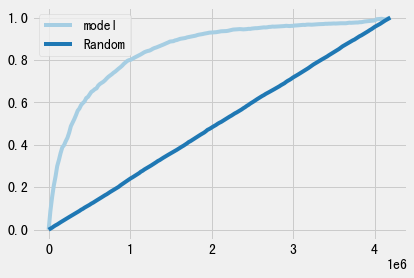

model     0.849702
Random    0.501867
dtype: float64


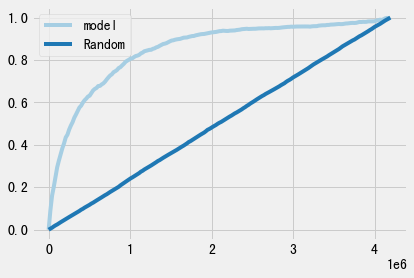

model     0.852277
Random    0.501867
dtype: float64


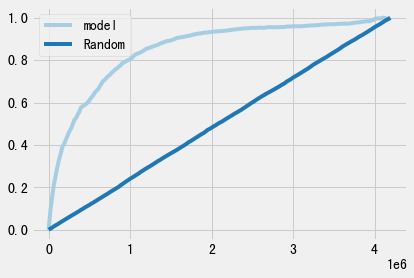

model     0.849638
Random    0.501867
dtype: float64


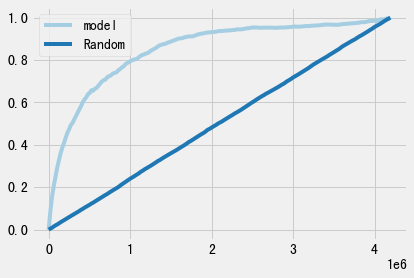

model     0.845293
Random    0.501867
dtype: float64


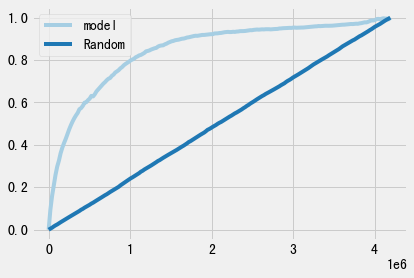

model     0.844563
Random    0.501867
dtype: float64


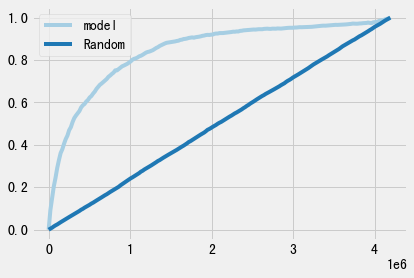

model     0.843064
Random    0.501867
dtype: float64


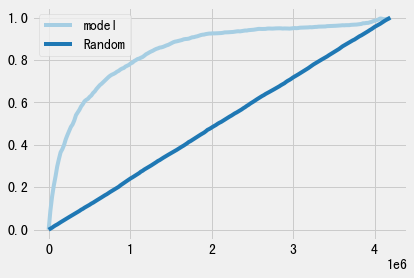

model     0.850234
Random    0.501867
dtype: float64


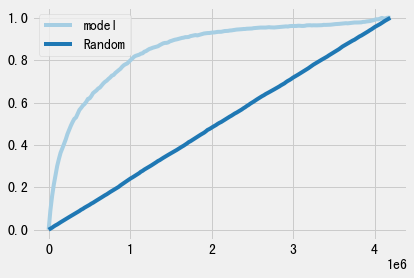

model     0.849273
Random    0.501867
dtype: float64


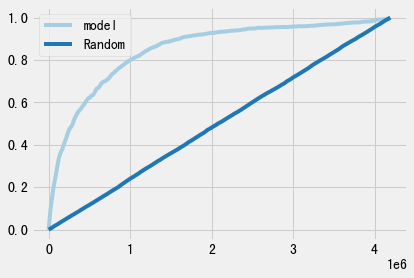

model     0.847881
Random    0.501867
dtype: float64


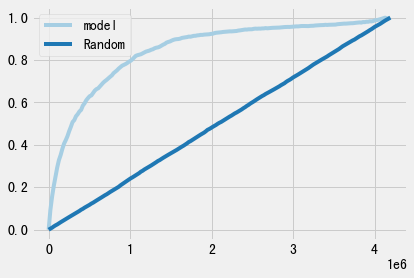

model     0.848265
Random    0.501867
dtype: float64


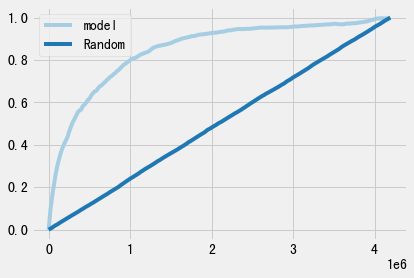

model     0.846037
Random    0.501867
dtype: float64


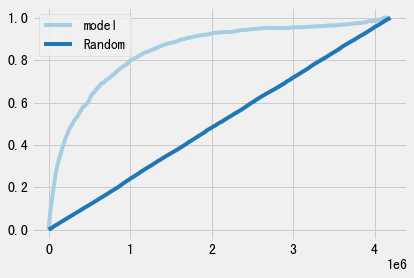

model     0.851284
Random    0.501867
dtype: float64


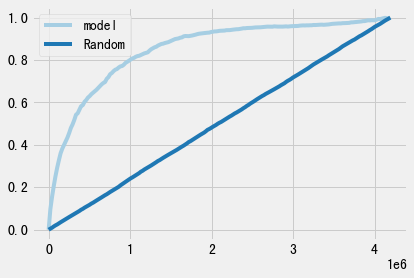

model     0.851450
Random    0.501867
dtype: float64


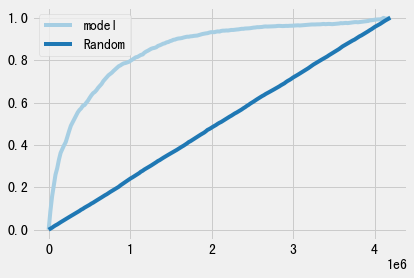

model     0.846419
Random    0.501867
dtype: float64


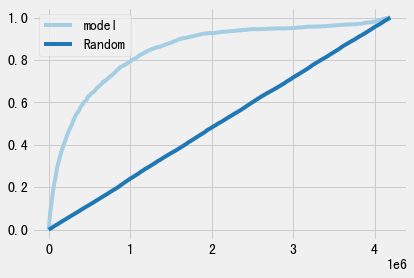

model     0.848157
Random    0.501867
dtype: float64


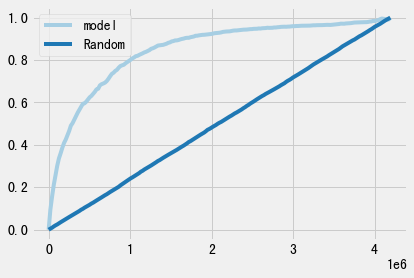

In [18]:
for grf_causalml_auuc in grf_causalml_auuc_list:
    print(grf_causalml_auuc[0])
    grf_causalml_auuc[1].plot()
    plt.show()

trainable_weights
p1_hidden_1/kernel:0
p1_hidden_1/bias:0
p1/kernel:0
p1/bias:0
non_trainable_weights
Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 p0_raw_features (InputLaye  [(None, 12)]                 0         []                            
 r)                                                                                               
                                                                                                  
 p1_hidden_1 (Dense)         (None, 8)                    104       ['p0_raw_features[0][0]']     
                                                                                                  
 treated_input (InputLayer)  [(None, 1)]                  0         []                            
                                                                                           

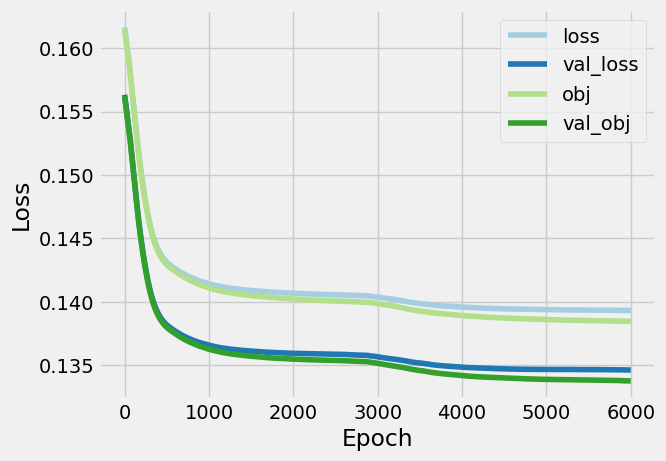

iteration =  2


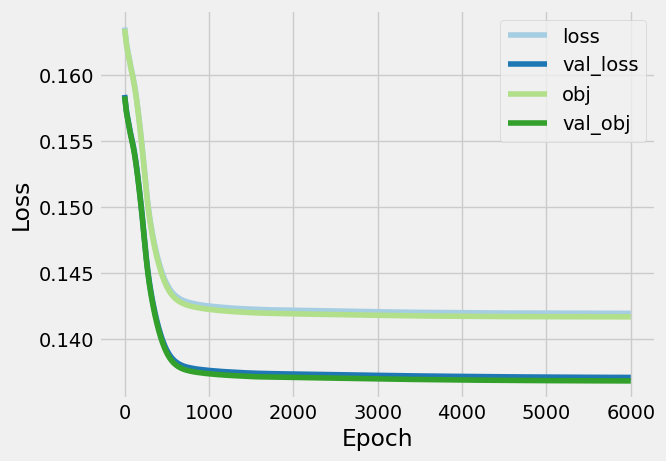

iteration =  3


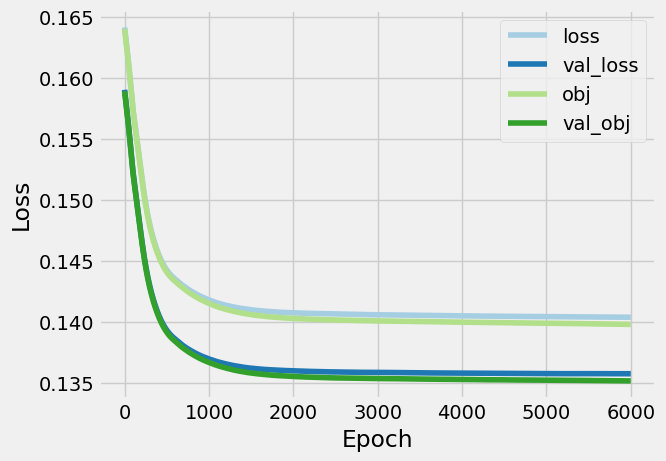

iteration =  4


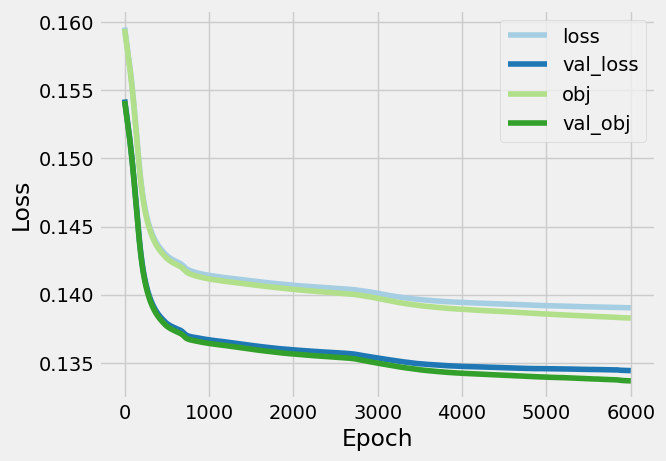

iteration =  5


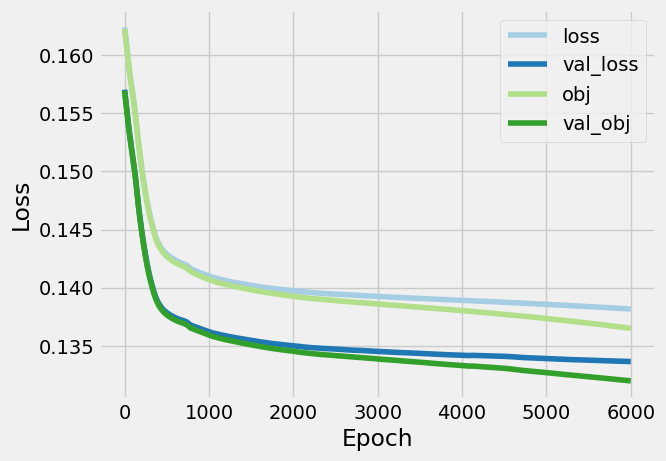

iteration =  6


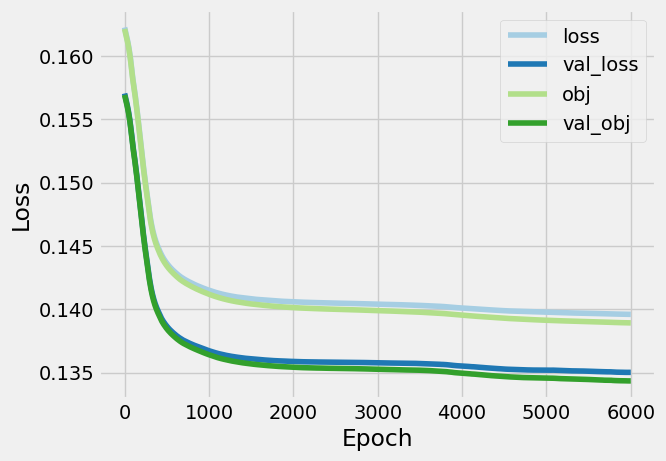

iteration =  7


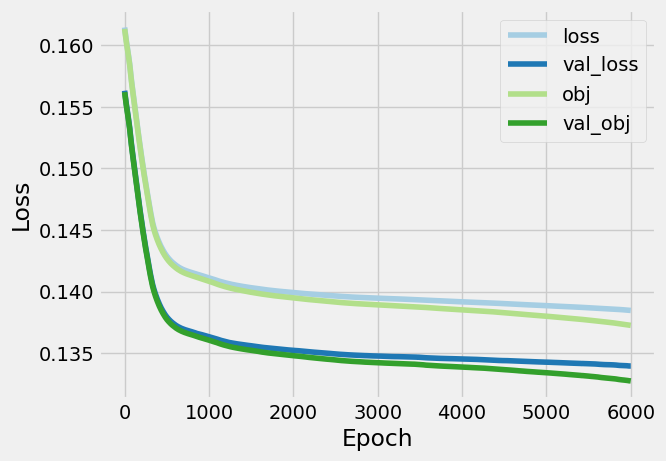

iteration =  8


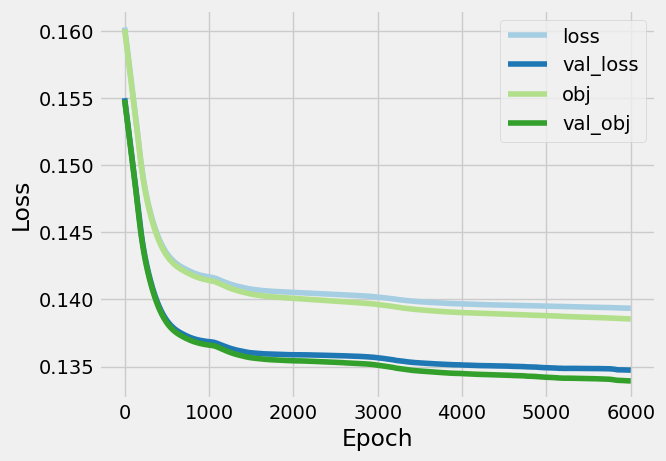

iteration =  9


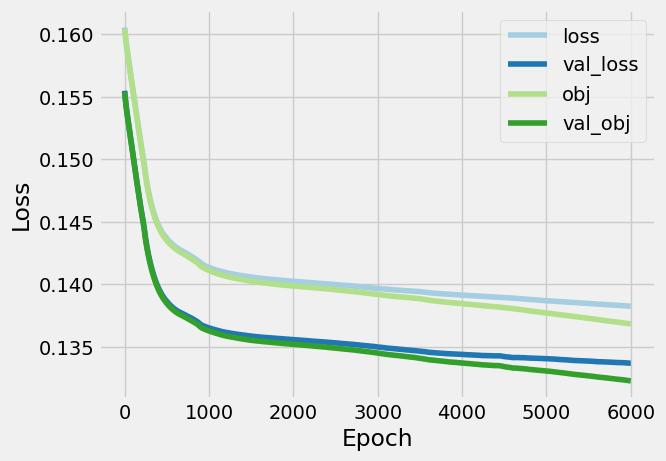

iteration =  10


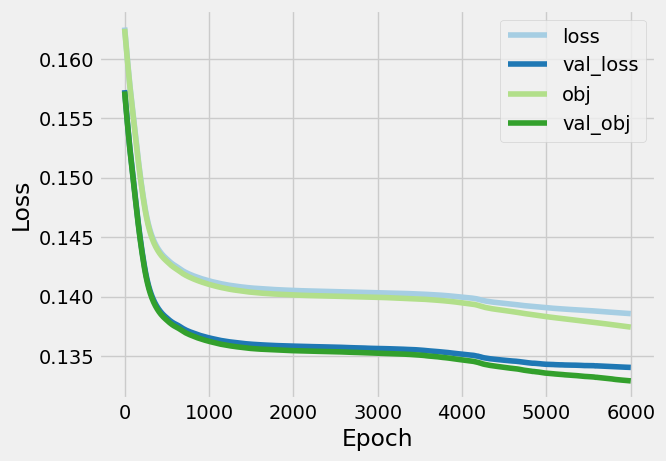

iteration =  11


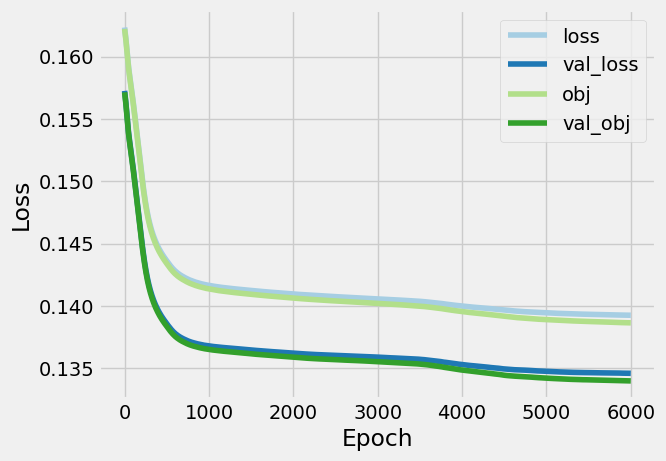

iteration =  12


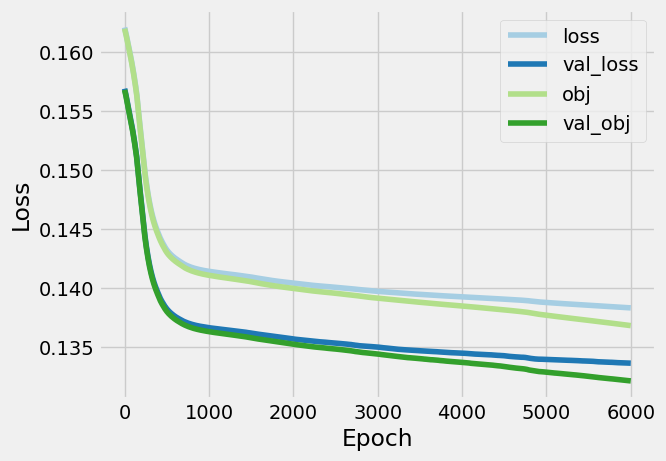

iteration =  13


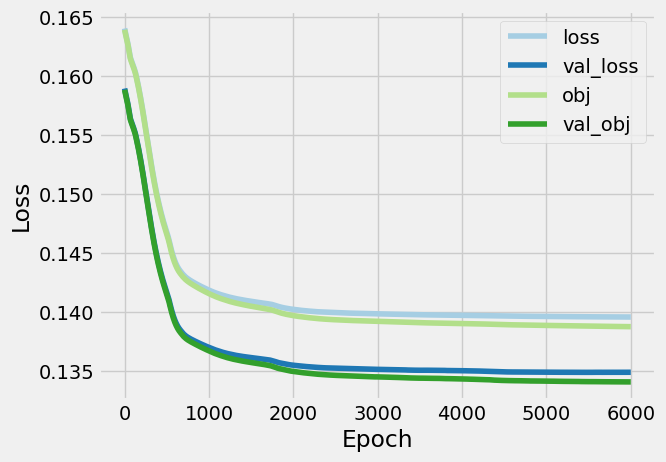

iteration =  14


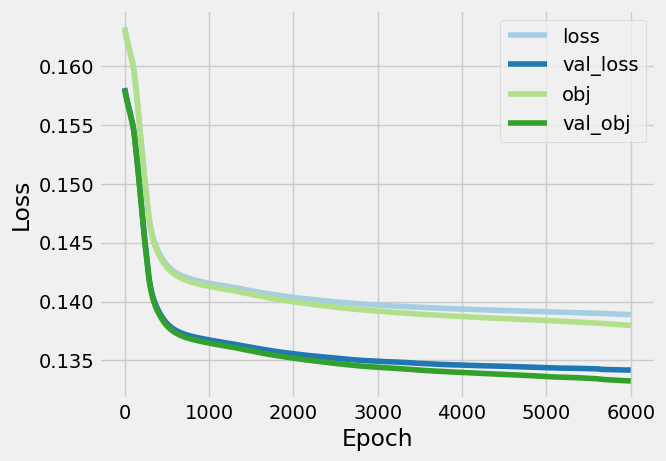

iteration =  15


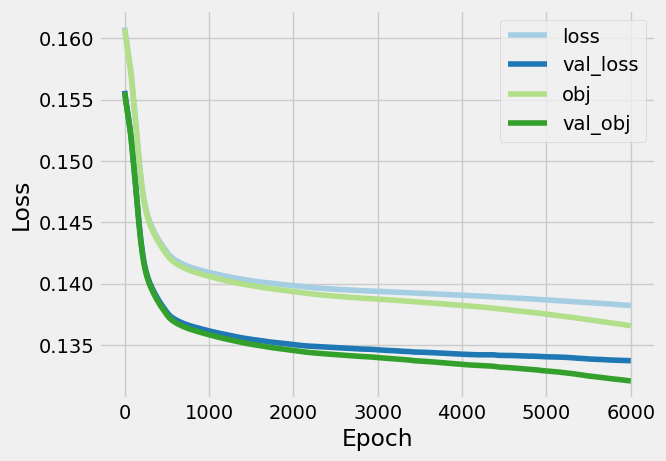

iteration =  16


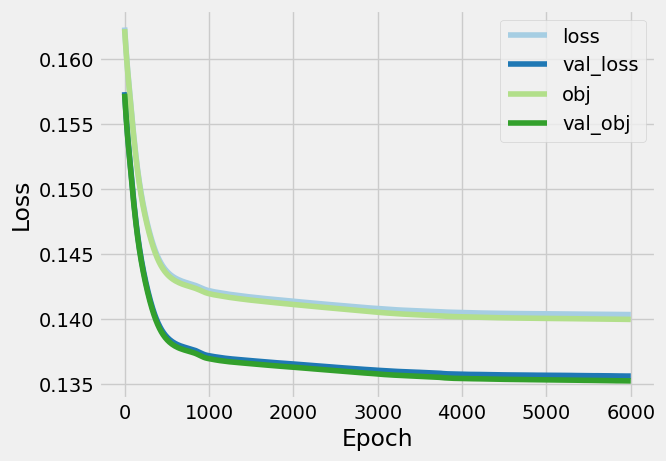

iteration =  17


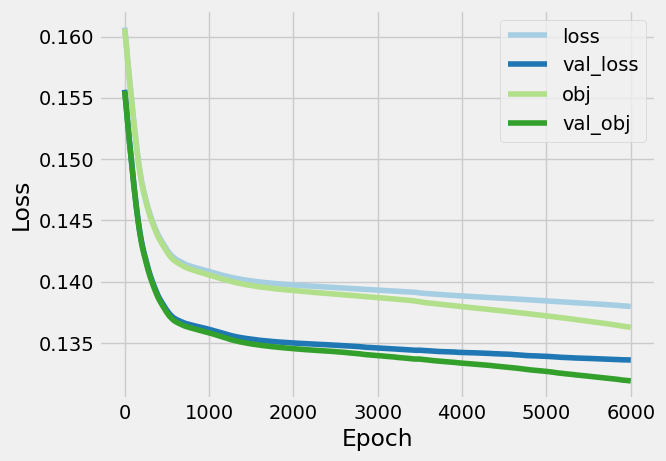

iteration =  18


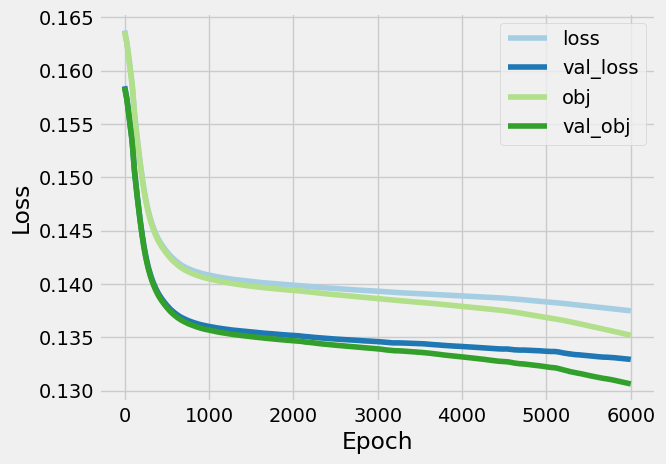

iteration =  19


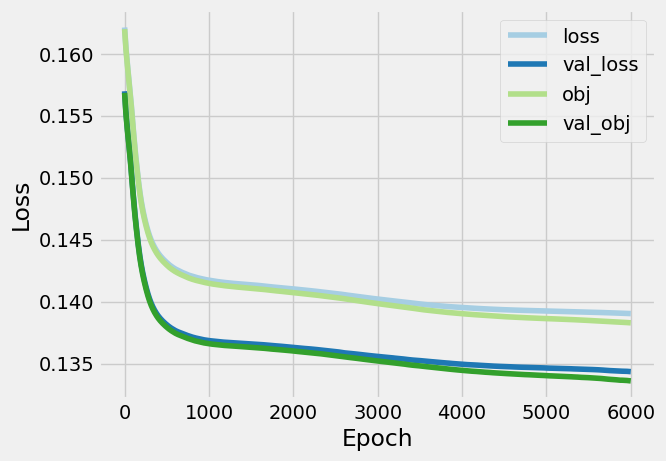

iteration =  20


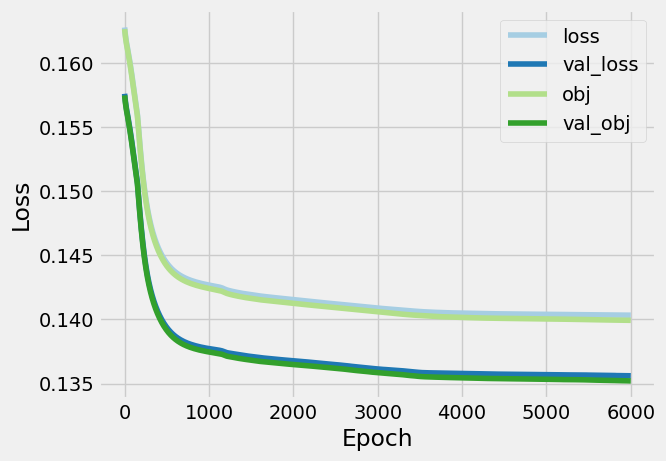

In [15]:
# UPLIFT RANK MODEL

import keras
import keras.backend as K
import tensorflow as tf
from keras.callbacks import LearningRateScheduler
from keras.callbacks import ReduceLROnPlateau
from model.uplift_model import *
import os

final_model = get_uplift_rank_criteo_model()
final_model.compile(loss=None, optimizer='adam')
#lambda y_true,y_pred: y_pred
print('trainable_weights')
for x in final_model.trainable_weights:
    print(x.name)
print('non_trainable_weights')
for x in final_model.non_trainable_weights:
    print(x.name)
final_model.summary()

model_save_dir = "../model_file/uplift/criteo/final_model/upliftRank"

# Ensure the directory exists
os.makedirs(model_save_dir, exist_ok=True)


for i in range(count):

    print("iteration = ", i + 1)
    
    final_model = get_uplift_rank_criteo_model()
    final_model.compile(loss=None, optimizer='adam')

    mcp_save = ModelCheckpoint(os.path.join(model_save_dir, f'uplift_rank_criteo_model_10mil_{i+1}.h5'), save_best_only=False, monitor='val_loss', mode='min', save_weights_only=True)
    # batch size = 1kw
    history = final_model.fit([X_train, T_train, Y_visit_train], validation_split=0.2, epochs=6000, batch_size=10000000, shuffle=True, verbose=0, callbacks=[mcp_save])

    plot_loss(history, "loss", "val_loss", "obj", "val_obj")


iteration =  1
131059/131059 [==============================] - 81s 615us/step
model    0.872778
dtype: float64


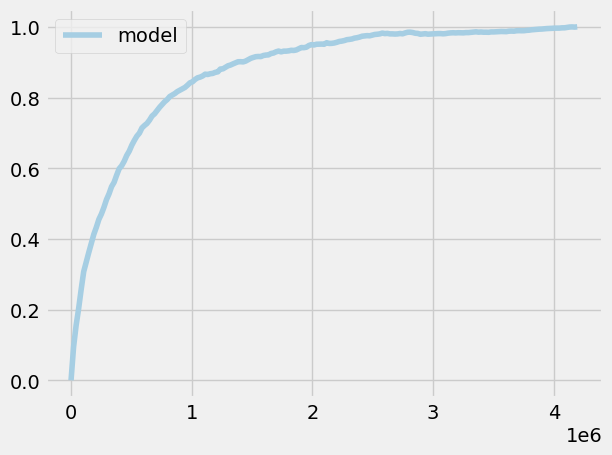



iteration =  2
131059/131059 [==============================] - 80s 607us/step
model    0.838239
dtype: float64


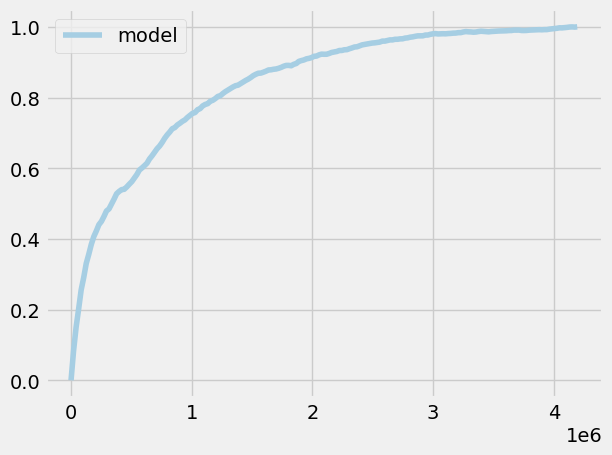



iteration =  3
131059/131059 [==============================] - 81s 618us/step
model    0.847574
dtype: float64


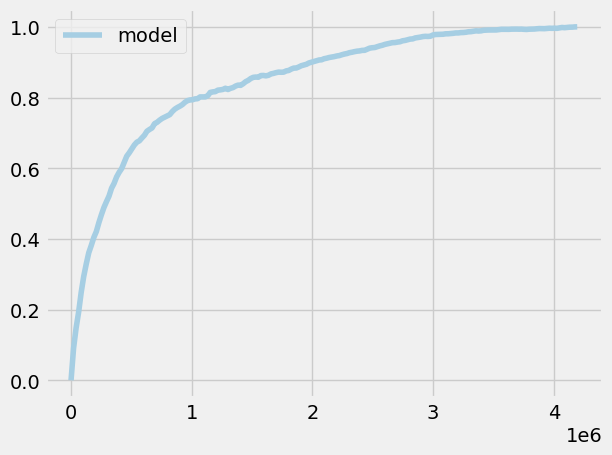



iteration =  4
131059/131059 [==============================] - 81s 616us/step
model    0.884864
dtype: float64


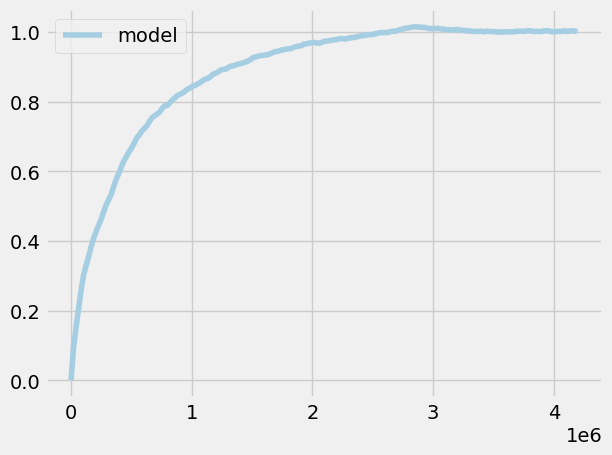



iteration =  5
131059/131059 [==============================] - 89s 675us/step
model    0.879505
dtype: float64


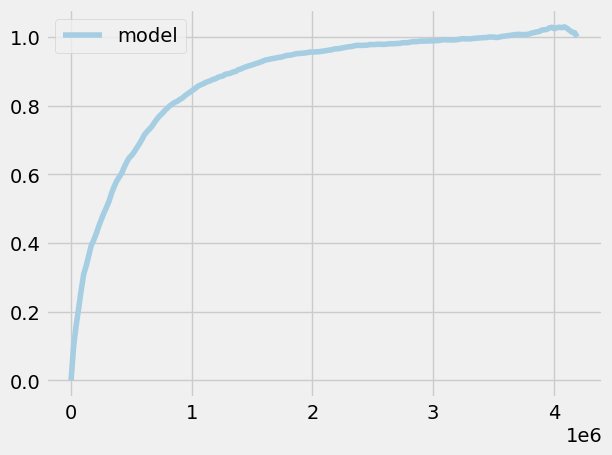



iteration =  6
131059/131059 [==============================] - 80s 608us/step
model    0.858953
dtype: float64


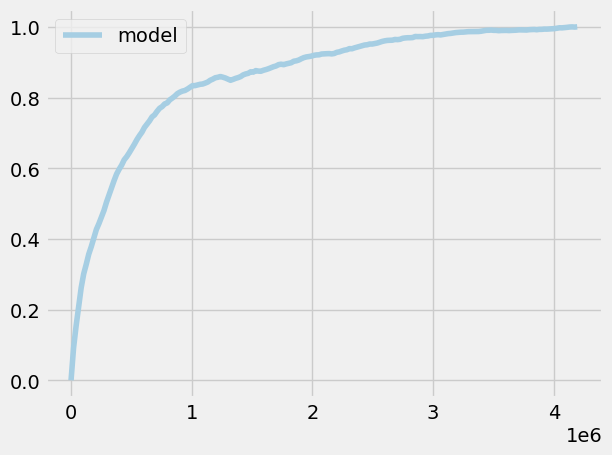



iteration =  7
131059/131059 [==============================] - 80s 607us/step
model    0.885572
dtype: float64


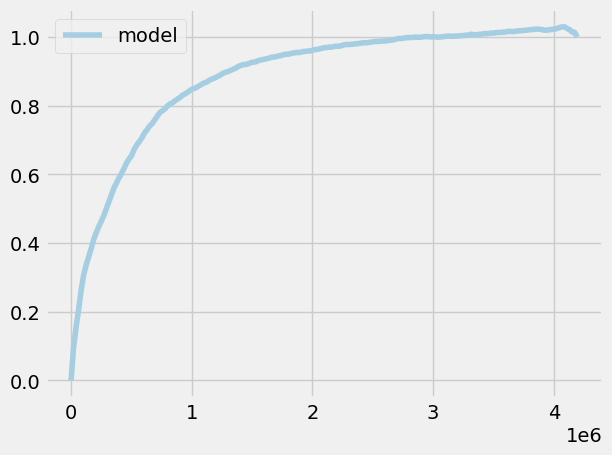



iteration =  8
131059/131059 [==============================] - 81s 617us/step
model    0.880696
dtype: float64


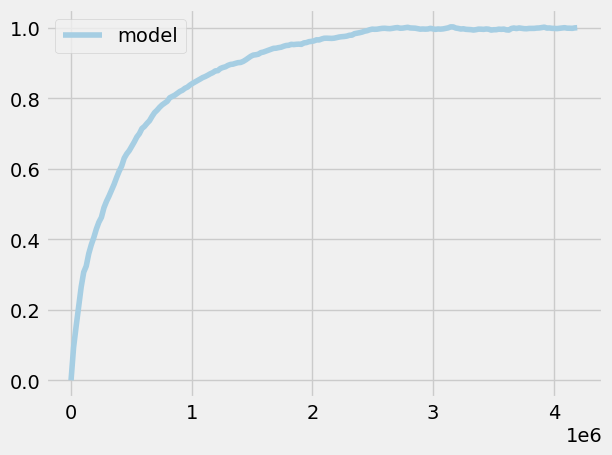



iteration =  9
131059/131059 [==============================] - 84s 642us/step
model    0.88265
dtype: float64


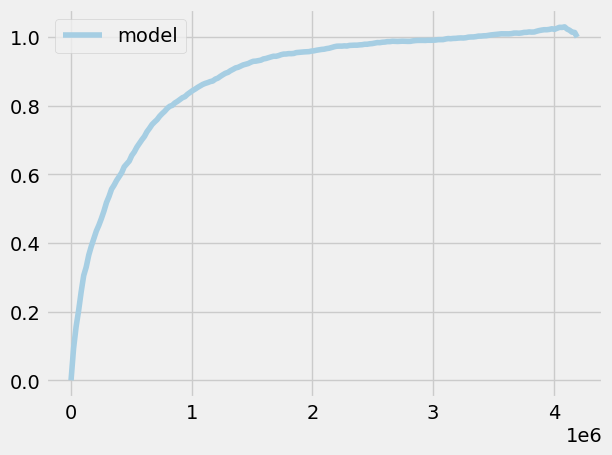



iteration =  10
131059/131059 [==============================] - 82s 623us/step
model    0.885559
dtype: float64


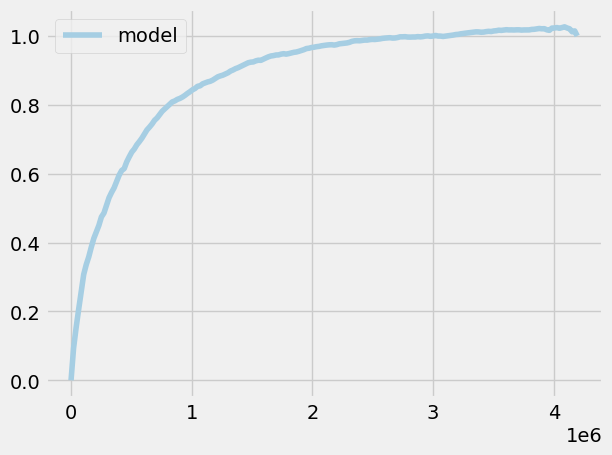



iteration =  11
131059/131059 [==============================] - 82s 628us/step
model    0.861688
dtype: float64


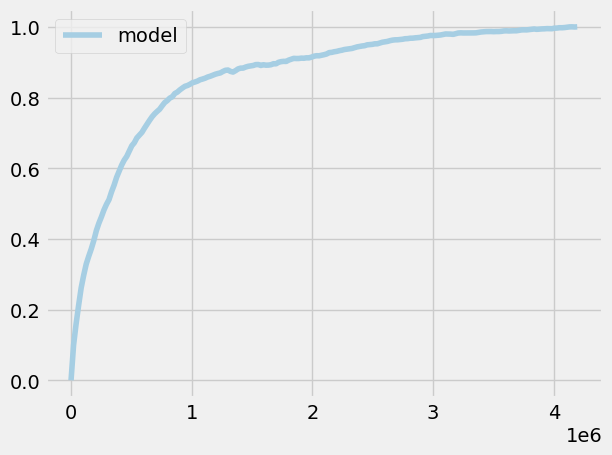



iteration =  12
131059/131059 [==============================] - 81s 616us/step
model    0.880942
dtype: float64


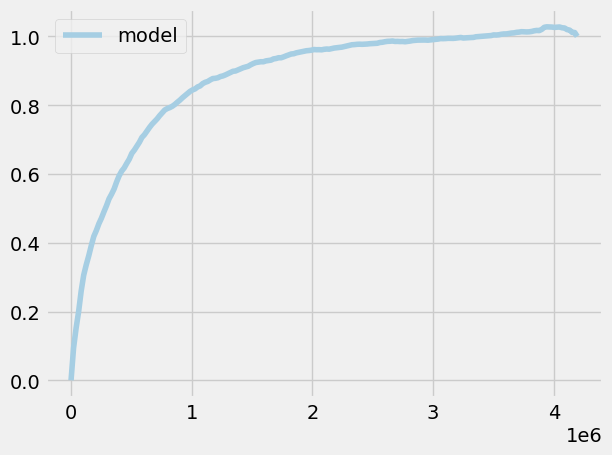



iteration =  13
131059/131059 [==============================] - 82s 622us/step
model    0.867395
dtype: float64


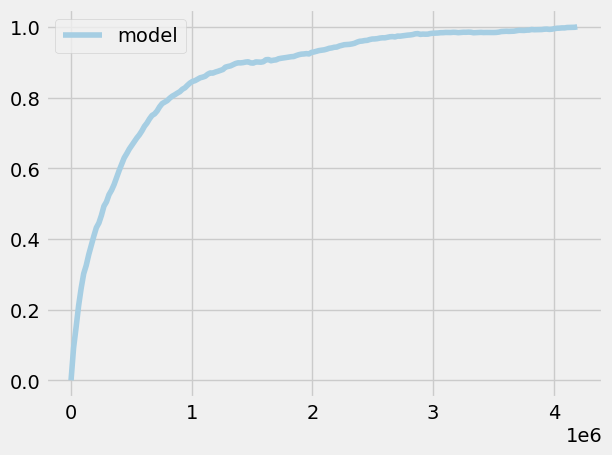



iteration =  14
131059/131059 [==============================] - 81s 619us/step
model    0.888359
dtype: float64


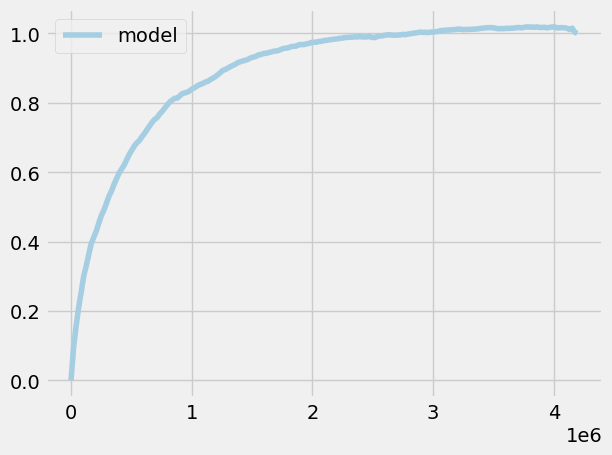



iteration =  15
131059/131059 [==============================] - 82s 621us/step
model    0.882325
dtype: float64


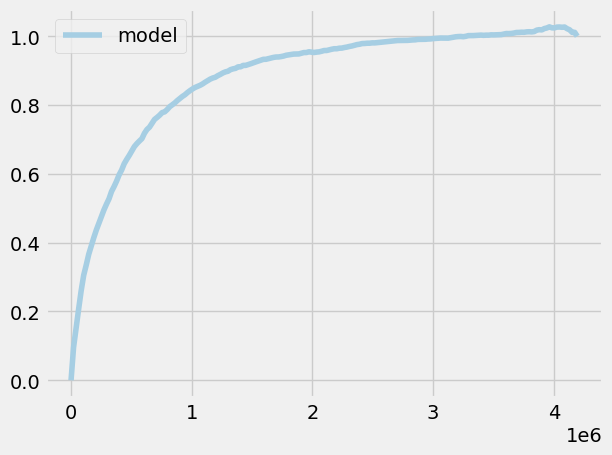



iteration =  16
131059/131059 [==============================] - 80s 612us/step
model    0.84139
dtype: float64


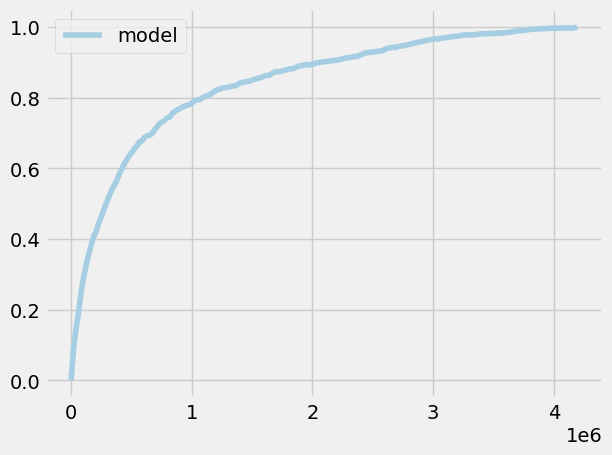



iteration =  17
131059/131059 [==============================] - 80s 611us/step
model    0.88096
dtype: float64


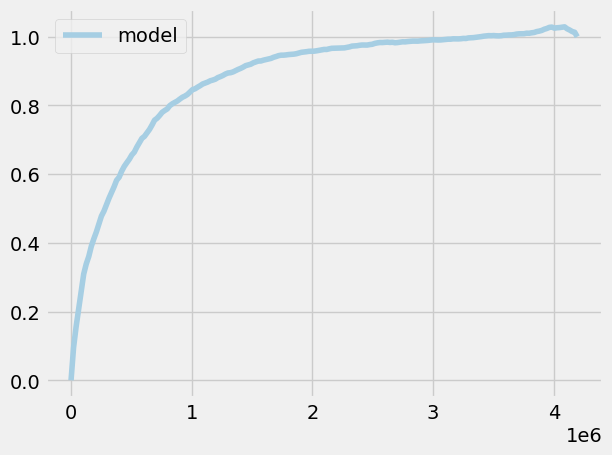



iteration =  18
131059/131059 [==============================] - 81s 616us/step
model    0.882367
dtype: float64


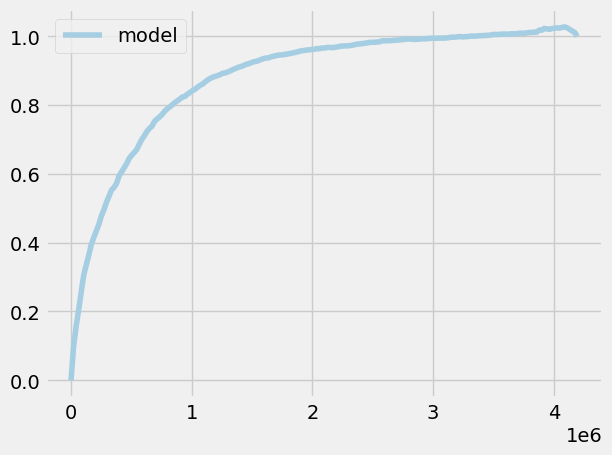



iteration =  19
131059/131059 [==============================] - 82s 628us/step
model    0.881807
dtype: float64


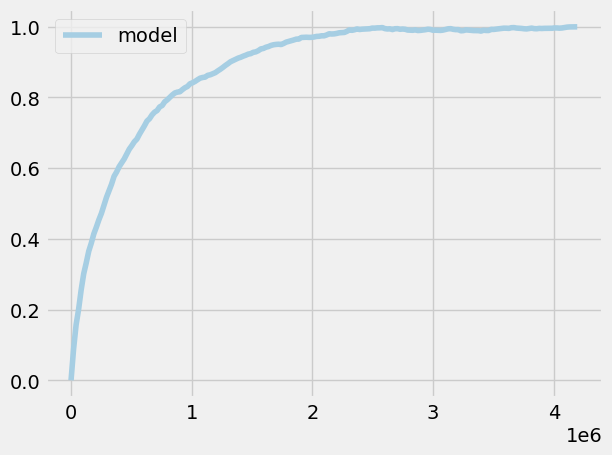



iteration =  20
131059/131059 [==============================] - 80s 613us/step
model    0.843135
dtype: float64


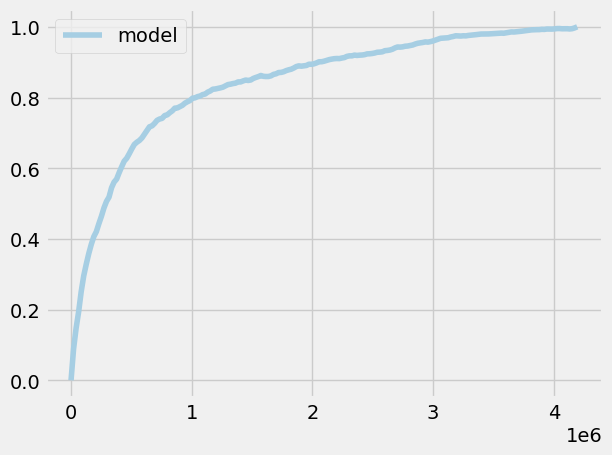

In [16]:
# UPLIFT RANK MODEL
# 1e-5
import keras
import keras.backend as K
import tensorflow as tf
from keras.callbacks import LearningRateScheduler
from keras.callbacks import ReduceLROnPlateau
from model.uplift_model import *

DUM_param_causalml_auuc_list = []

for i in range(count):

    print("iteration = ", i + 1)

    final_model = get_uplift_rank_criteo_model()
    final_model.load_weights('../model_file/uplift/criteo/final_model/upliftRank/uplift_rank_criteo_model_10mil_{}.h5'.format(i+1))

    uplift_rank_pre = final_model.predict([X_test, T_test, Y_visit_test])
    
    DUM_param_causalml_auuc = get_causalml_auuc(Y=Y_visit_test, T=T_test, ite_pred=uplift_rank_pre)
    
    DUM_param_causalml_auuc_list.append(DUM_param_causalml_auuc)
    
    print("\n")


In [40]:
import numpy as np

def get_auuc_scores(causalml_auuc_list): 
    auuc_scores = []
    for x in causalml_auuc_list:
        auuc_scores.append(x[0].iloc[0])
    return np.array(auuc_scores)

def print_auuc_res(model_name, auuc_scores):
    print("model: ", model_name)
    
    print("auuc list: ", auuc_scores)
    print("auuc mean: ", np.mean(auuc_scores))
    print("auuc variance: ", np.var(auuc_scores))
    print("auuc standard deviation: ", np.std(auuc_scores))
    
    print()
    
    
def get_avg_uplift_gain(causalml_auuc_list):
    uplift_gain_list = [causalml_auuc[1] for causalml_auuc in causalml_auuc_list]
    avg_uplift_gain = uplift_gain_list[0]
    for uplift_gain in uplift_gain_list[1:]:
        avg_uplift_gain['model'] = avg_uplift_gain['model'] + uplift_gain['model']
    avg_uplift_gain['model'] = avg_uplift_gain['model'] / len(uplift_gain_list)
    
    return avg_uplift_gain

In [58]:
slearner_auuc_scores = get_auuc_scores(slearner_causalml_auuc_list)
xlearner_auuc_scores = get_auuc_scores(xlearner_causalml_auuc_list)
grf_auuc_scores = get_auuc_scores(grf_causalml_auuc_list)
DUM_auuc_scores = get_auuc_scores(DUM_causalml_auuc_list)
DUM_param_auuc_scores = get_auuc_scores(DUM_param_causalml_auuc_list)


print_auuc_res("S-Learner", slearner_auuc_scores)
print_auuc_res("X-Learner", xlearner_auuc_scores)
print_auuc_res("GRF", grf_auuc_scores)
print_auuc_res("DUM", DUM_auuc_scores)
print_auuc_res("DUM", DUM_param_auuc_scores)

model:  S-Learner
auuc list:  [0.84691606 0.84964742 0.83797772 0.83992103 0.8443997  0.84004913
 0.84875097 0.83888575 0.85234363 0.83983193 0.84375217 0.84139796
 0.84368753 0.84492053 0.84874996 0.83721579 0.85498999 0.83643299
 0.83864713 0.8515948 ]
auuc mean:  0.8440056103564533
auuc variance:  2.9276292655501438e-05
auuc standard deviation:  0.00541075712405403

model:  X-Learner
auuc list:  [0.82425036 0.84647606 0.7115612  0.83014904 0.80005398 0.8476138
 0.85902245 0.83567188 0.85576558 0.83635172 0.84649848 0.85428915
 0.84579511 0.84242052 0.85053568 0.73726039 0.84857866 0.83896442
 0.84836929 0.847946  ]
auuc mean:  0.8303786878482585
auuc variance:  0.001424419921293971
auuc standard deviation:  0.037741488064118124

model:  GRF
auuc list:  [0.85245286 0.84843086 0.84709928 0.84691561 0.85097175 0.84970216
 0.8522771  0.84963843 0.84529287 0.84456274 0.84306421 0.85023399
 0.84927254 0.84788145 0.8482649  0.8460369  0.85128372 0.8514496
 0.84641857 0.84815664]
auuc mean:

In [60]:
slearner_avg_uplift_gain = get_avg_uplift_gain(slearner_causalml_auuc_list)
xlearner_avg_uplift_gain = get_avg_uplift_gain(xlearner_causalml_auuc_list)
grf_avg_uplift_gain = get_avg_uplift_gain(grf_causalml_auuc_list)
DUM_avg_uplift_gain = get_avg_uplift_gain(DUM_causalml_auuc_list)
DUM_param_avg_uplift_gain = get_avg_uplift_gain(DUM_param_causalml_auuc_list)


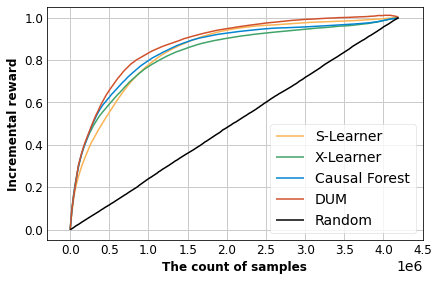

In [88]:
# test AUUC
import matplotlib.pyplot as plt
from matplotlib.pyplot import MultipleLocator

plt.rc('font',family='Times New Roman') 
# plt.figure(facecolor='white')
# plt.axes(facecolor='white')
plt.rcParams['axes.facecolor']='white'
plt.rcParams['figure.facecolor']='white'
plt.rcParams['savefig.facecolor']='white'

ax = plt.gca()
ax.spines['top'].set_visible(True)
ax.spines['top'].set_color('black')
ax.spines['top'].set_linewidth('0.8')

ax.spines['bottom'].set_visible(True)
ax.spines['bottom'].set_color('black')
ax.spines['bottom'].set_linewidth('0.8')

ax.spines['left'].set_visible(True)
ax.spines['left'].set_color('black')
ax.spines['left'].set_linewidth('0.8')


ax.spines['right'].set_visible(True)
ax.spines['right'].set_color('black')
ax.spines['right'].set_linewidth('0.8')


x_index = slearner_avg_uplift_gain.index.to_numpy()

plt.plot(x_index, slearner_avg_uplift_gain['model'].values, color='#FBB454', label='S-Learner', linewidth=1.5)
plt.plot(x_index, xlearner_avg_uplift_gain['model'].values, color='#40a368', label='X-Learner', linewidth=1.5)
plt.plot(x_index, grf_avg_uplift_gain['model'].values, color='#0485d1', label='Causal Forest', linewidth=1.5)
# plt.plot(x_index, DUM_avg_uplift_gain['model'].values, color='#D1512D', label='DUM', linewidth=1.5)
plt.plot(x_index, DUM_param_avg_uplift_gain['model'].values, color='#D1512D', label='DUM', linewidth=1.5)

plt.plot(x_index, slearner_avg_uplift_gain['Random'].values, color='#000000', label='Random', linewidth=1.5)

plt.xlabel('The count of samples', fontsize=12, fontweight='bold')
plt.ylabel('Incremental reward', fontsize=12, fontweight='bold')

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)


plt.xlim(-3e5, 4.5e6)
plt.ylim(-0.05, 1.05)


x_major_locator=MultipleLocator(5e5)
# y_major_locator=MultipleLocator(0.15)
y_major_locator=MultipleLocator(0.2)
ax.xaxis.set_major_locator(x_major_locator)
ax.yaxis.set_major_locator(y_major_locator)

plt.grid(True)

plt.legend()

# plt.savefig('../figure/uplift/avg_auuc_criteo_new.pdf', format='pdf', bbox_inches = 'tight')

plt.show()

In [55]:
slearner_avg_uplift_gain.to_csv("../figure/uplift/figure_data/criteo/uplift_gain_criteo/slearner_avg_uplift_gain.csv")
xlearner_avg_uplift_gain.to_csv("../figure/uplift/figure_data/criteo/uplift_gain_criteo/xlearner_avg_uplift_gain.csv")
grf_avg_uplift_gain.to_csv("../figure/uplift/figure_data/criteo/uplift_gain_criteo/grf_avg_uplift_gain.csv")
DUM_param_avg_uplift_gain.to_csv("../figure/uplift/figure_data/criteo/uplift_gain_criteo/DUM_param_avg_uplift_gain.csv")
